In [0]:
#Milestone 1 - ANN
"""Epoch 45: Train err: 2.3768524369178254, Train loss: 9.565495610237122 |Validation err: 2.4339216453787125, Validation loss: 10.037699146270752"""
#Milestone 2 - Surrounding ANN
"""Epoch 28: Train err: 2.209493298325543, Train loss: 8.441690085685416 |Validation err: 2.305450635777982, Validation loss: 8.75162491431603"""
#Milestone 2 - Focused RNN
"""Epoch 45: Train err: 2.4221065864825215, Train loss: 9.995889015819715 |Validation err: 2.4251071704415033, Validation loss: 9.692658022830361"""
#Milestone 3 - Surrounding RNN
"""Epoch 44: Train err: 2.3512696408416187, Train loss: 9.290438038029082 |Validation err: 2.544152707211132, Validation loss: 11.564151604970297"""
#Milestone 3 - Surrounding GRU
"""Epoch 40: Train err: 2.298863480285685, Train loss: 8.73277427725596 |Validation err: 2.4770519715447668, Validation loss: 10.617209951082865"""
#Milestone 3 - Surrounding LTSM:
"""Epoch 28: Train err: 2.342810915274806, Train loss: 9.048288182036517 |Validation err: 2.488783025575083, Validation loss: 10.927148024241129"""
#Milestone 3 - Surrounding LSTM, more complex ANN:
"""Epoch 45: Train err: 2.226198731197156, Train loss: 8.230105080016672 |Validation err: 2.3986548753923542, Validation loss: 10.326567649841309"""

'Epoch 45: Train err: 2.226198731197156, Train loss: 8.230105080016672 |Validation err: 2.3986548753923542, Validation loss: 10.326567649841309'

In [0]:
######## >>>>>>>>>>> For the google colab to be able to access the meta files you must add the APS360 team shared folder to your drive by right clicking on it <<<<<<<<<<< ##############
#mount googledrive
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# DATASET

## Library

### File manager

In [0]:
import pandas as pd
# Prints how many nulls there are in max and min temp
def test_null_csv_daily(dir, station, start_year, end_year, out_name =  None):
    """
      Args:
          station (string): eg. "ON_6158355"
          start_year (int): Starting year
          end_year (int)  : Ending year
          start_date (int): start_date = 0 is day 1 of starting year (Where we want the sampling to start)
          out_name (optional string) : change the name of the output file
    """
    if out_name == None:
      out_name = station + '_' + str(start_year) + '-' + str(end_year)
    master_path = '/content/gdrive/My Drive/APS360 Team/milestone 3/' + dir
    src_path = master_path + 'datasets/'
    newdf = pd.read_csv(src_path + out_name + ".csv")
    print("Max temp nulls: " + str(newdf['Max Temp (°C)'].isnull().sum()))
    print("Min temp nulls: " + str(newdf['Min Temp (°C)'].isnull().sum()))
    print("Total Precip (mm) nulls: " + str(newdf['Total Precip (mm)'].isnull().sum()))
    #print("Tot precip nans: " + str(pd.isna(newdf['Total Precip (mm)']).sum()))
    

In [0]:
import pandas as pd
# Interpolates null values in min and max temp cols
def inter_nulls_csv_daily(dir, station, start_year, end_year, out_name =  None):
    """
      Args:
          station (string): eg. "ON_6158355"
          start_year (int): Starting year
          end_year (int)  : Ending year
          start_date (int): start_date = 0 is day 1 of starting year (Where we want the sampling to start)
          out_name (optional string) : change the name of the output file
    """
    if out_name == None:
      out_name = station + '_' + str(start_year) + '-' + str(end_year)
    master_path = '/content/gdrive/My Drive/APS360 Team/milestone 3/' + dir
    src_path = master_path + 'datasets/'
    newdf = pd.read_csv(src_path + out_name + ".csv")
    newdf['Max Temp (°C)'] = newdf['Max Temp (°C)'].interpolate()
    newdf['Min Temp (°C)']= newdf['Min Temp (°C)'].interpolate()
    newdf['Total Precip (mm)']= newdf['Total Precip (mm)'].interpolate()
    
    newdf.to_csv( src_path +  out_name + ".csv")

In [0]:
#Raw csv downloaded must be place in /raw folder
#Merged csv will be stored at /datasets folder
# Also interpolates the null max and min temp
def make_csv_daily(dir, station, start_year, end_year, out_name =  None):
  """
    Args:
        station (string): eg. "ON_6158355"
        start_year (int): Starting year
        end_year (int)  : Ending year
        start_date (int): start_date = 0 is day 1 of starting year (Where we want the sampling to start)
        out_name (optional string) : change the name of the output file
    """
  if out_name == None:
    out_name = station + '_' + str(start_year) + '-' + str(end_year)
  master_path = '/content/gdrive/My Drive/APS360 Team/milestone 3/' + dir
  src_path = master_path
  dest_path = master_path + 'datasets/'
  fout = open(dest_path + out_name + ".csv","w+")
  in_base = "en_climate_daily_" + station + '_' #eg: 'en_climate_daily_ON_6158355_'
  in_end = '_P1D.csv'
  # first file:
  for line in open(src_path + in_base + str(start_year) + in_end):
      fout.write(line)
  # now the rest:    
  for num in range(start_year + 1, end_year + 1):
      f = open(src_path + in_base + str(num) + in_end)
      f.__next__() # skip the header
      for line in f:
          fout.write(line)
      f.close() # not really needed
  fout.close()
  inter_nulls_csv_daily(dir, station, start_year, end_year, out_name)

In [0]:
def getDayAttrLabels(days_ahead, set_label_attributes):
  dayAttrLabels ={}
  i=0
  for day in range(1,days_ahead+1):
     for attr in set_label_attributes:
       dayAttrLabels[i] = 'Day{} {}'.format(day,attr)
       i+=1
  return dayAttrLabels
      

### Set creators

In [0]:
###Hyper parameters of data sets

####### Set #######
set_start_day = 0
set_num_days = 8
set_days_ahead = 1 #predict 5 days ahead
set_data_attributes = ['Max Temp (°C)', 'Min Temp (°C)','Total Precip (mm)']
set_label_attributes = ['Max Temp (°C)', 'Min Temp (°C)']
#set_attributes = ['Max Temp (°C)', 'Min Temp (°C)']

stationSrc = "ON_6158355"
dirSrc =  "data/Target A/target/"
dirSurr = "data/Target A/surr/"
stationSurr = ["ON_615S001", "ON_6158751", "ON_615HMAK"]

start_season_day = 50
num_seasons = 4

####### Training Set #######
start_year_train = 2008
end_year_train = 2013 
# Must be the same as training because of season syncing
start_date_train = set_start_day 
end_date_train = None

####### Validation Set #######
start_year_val = 2014
end_year_val = 2014
# Must be the same as training because of season syncing
start_date_val = set_start_day 
end_date_val = None

####### Global variables #######
set_num_stations = 1 + len(stationSurr)
glob_dayAttr_labels = getDayAttrLabels(set_days_ahead, set_label_attributes) #make labels for day-attribute combinations
#glob_inp_size = set_num_stations * len(set_data_attributes)
RNN_percell_days = 2
glob_inp_size = set_num_stations * len(set_data_attributes)*RNN_percell_days
glob_out_size = len(set_label_attributes)*set_days_ahead
master_path = '/content/gdrive/My Drive/APS360 Team/milestone 3/'

In [0]:
import pandas as pd
import numpy as np
import math
from torch.utils.data import Dataset, DataLoader
class WeatherSurroundingDataset(Dataset):
    """Weather dataset."""

    def __init__(self, dirSrc, dirSurr, stationSrc, stationSurr, start_year, end_year, days_ahead =1, start_date = 0, end_date = None, num_days = 7, data_attributes = ['Max Temp (°C)', 'Min Temp (°C)'], label_attributes = ['Max Temp (°C)', 'Min Temp (°C)'], make_csv = False, out_name = None):
        """
        Args:
            dirSrc (string) =  "data/Target A/target/" relative directory of target station
            dirSurr (string) = "data/Target A/surr/" relative directory of surrounding stations
            stationSrc (string): eg. "ON_6158355"
            stationSurr (list of strings)
            start_year (int): Starting year
            end_year (int)  : Ending year
            days_ahead (int): number of days to be predicted
            start_date (int): start_date = 0 is day 1 of starting year (Where we want the sampling to start)
            end_date (optional int) : end_date = 7 is day 8 of starting year(min = 7 because of LABEL!). If provided changes the end date from last day of last year.
            num_days (optional int) : num_days is the interval of days before the label.
            make_csv (optional bool): If true it will call make_csv_daily function to create the csv from /raw datasets into /datasets
            out_name (optional string) : change the name of the output file which it reads from
        """
        self.data_attributes = data_attributes
        self.label_attributes = label_attributes
        self.days_ahead = days_ahead 
        self.num_days = num_days
        if(out_name == None):
          self.out_name = stationSrc + '_' + str(start_year) + '-' + str(end_year)
        else:
          self.out_name = out_name
        master_path = '/content/gdrive/My Drive/APS360 Team/milestone 3/' +  dirSrc
        dest_path = master_path + 'datasets/'
        if (make_csv):
          make_csv_daily(dirSrc, stationSrc, start_year, end_year, out_name = out_name)

        self.src_csv = pd.read_csv(dest_path + self.out_name +'.csv')

        self.sur_csvs = []

        master_path = '/content/gdrive/My Drive/APS360 Team/milestone 3/' +  dirSurr
        dest_path = master_path + 'datasets/'
        for station_surr in stationSurr:
          file_name = station_surr + '_' + str(start_year) + '-' + str(end_year)
          if (make_csv):
            make_csv_daily(dirSurr, station_surr, start_year, end_year, out_name = file_name)
          print(dest_path + file_name +'.csv')
          self.sur_csvs.append(pd.read_csv(dest_path + file_name +'.csv'))

        self.start_date = start_date
        if( end_date == None):
          self.end_date = len(self.src_csv) - 1
        else:
          self.end_date = end_date

        # Just making sure files are of the same size
        for i, cur_sur_csv in enumerate(self.sur_csvs):
          if(len(self.src_csv) != len(cur_sur_csv)):
            if(len(self.src_csv) > len(cur_sur_csv)):
              assert(0) # Surrounding stations don't have sufficient days to fill the dataset
            print("Caution: Traget station has {trg_days} days while surr station idx {idx} has {sur_days} days".format(len(self.src_csv), i, len(cur_sur_csv)))

    def __len__(self):
        return self.end_date - self.start_date +1 - self.num_days - self.days_ahead if self.end_date - self.start_date +1 - self.num_days - self.days_ahead >= 0 else 0

    def __getitem__(self, idx):
        data = self.src_csv.loc[ idx + self.start_date : idx + self.start_date + self.num_days - 1 , self.data_attributes ]
        
        for cur_csv in self.sur_csvs:
          new_data = cur_csv.loc[ idx + self.start_date : idx + self.start_date + self.num_days - 1 , self.data_attributes ]
          data = np.concatenate([data, new_data], axis=1)

        #janelle: predict 2 days ahead 
        start_days_ahead =  idx + self.start_date + self.num_days
        end_days_ahead = start_days_ahead + self.days_ahead - 1  
        
        #label = self.src_csv.loc[ idx + self.start_date + self.num_days, ['Max Temp (°C)', 'Min Temp (°C)'] ]
        
        label = self.src_csv.loc[start_days_ahead:end_days_ahead, self.label_attributes ] 
        label = np.asarray(label).flatten()
        label = label.astype('float')

        data = data.flatten()

        #print('Data: {}'.format(data))
        #print('Data shape: {}'.format(data.shape))
        #print('Labels shape: {}'.format(label.shape))
        #print('Labels: {}'.format(label[:2]))
        sample = [data, label]

        return sample

    def giveSeasonalSets(self, start_season_day = 0, num_seasons = 4):
        """num_seasons > 1 or meaningless and unknown behaviour"""
        seasonalSets = [None] * num_seasons

        #seasonIntervals = math.ceil(365.25 / num_seasons)
        seasonIntervals = math.floor((self.end_date - self.start_date) / (math.floor((self.end_date - self.start_date + 1) / 365) * num_seasons))

        if(start_season_day > seasonIntervals):
          start_season_day = start_season_day % seasonIntervals
          print("Truncated start_season_day to {}. Accepts values between 0 ~ {}".format(start_season_day, seasonIntervals-1))
        if(start_season_day > 0):
          seasonalSets[-1] = SeasonalDataset(self, 0, start_season_day - 1)
        curLastDay = seasonIntervals + start_season_day - 1
        seasonalSets[0] = SeasonalDataset(self, start_season_day - self.num_days, curLastDay) # start date can include days from previous season to predict current season days

        curStartDay = curLastDay + 1 
        curLastDay = seasonIntervals + curStartDay - 1
        i = 1
        while(curLastDay < self.end_date): # Do not add the last interval
          #print("giveSeasonalSets: " + str(i) + " " + str(curStartDay) + " " + str(curLastDay))
          if(seasonalSets[i] == None ):
            seasonalSets[i] = SeasonalDataset(self, curStartDay - self.num_days, curLastDay)
          else:
            seasonalSets[i] = seasonalSets[i] + SeasonalDataset(self, curStartDay - self.num_days, curLastDay)
          curStartDay = curLastDay + 1
          curLastDay = seasonIntervals + curStartDay - 1
          i += 1
          i %= num_seasons

        # Now add the last set
        curLastDay = self.end_date
        if(seasonalSets[i] == None ):
            seasonalSets[i] = SeasonalDataset(self, curStartDay - self.num_days, curLastDay)
        else:
            seasonalSets[i] = seasonalSets[i] + SeasonalDataset(self, curStartDay - self.num_days, curLastDay)

        return seasonalSets


class SeasonalDataset(WeatherSurroundingDataset):
    """Seasonal dataset. Inherited from WSDataset. Only used in helper function -giveSeasonalSets-"""

    def __init__(self, weathersurroundingDataset, start_date, end_date):
        """
        Args:
            weathersurroundingDataset: Must previously loaded all the years and stations in a WeatherSurroundingDataset
        """
        self.data_attributes = weathersurroundingDataset.data_attributes
        self.label_attributes = weathersurroundingDataset.label_attributes
        self.days_ahead = weathersurroundingDataset.days_ahead
        self.num_days = weathersurroundingDataset.num_days
        self.out_name = weathersurroundingDataset.out_name
        self.src_csv = weathersurroundingDataset.src_csv
        self.sur_csvs = weathersurroundingDataset.sur_csvs
        self.start_date = start_date if start_date >= 0 else 0
        self.end_date = end_date

In [0]:
# start_year_train = 2008
# end_year_train = 2013 #changed from 2019 because in our proposal we said 07-16 is train
# start_date_train = 0
# end_date_train = None
# num_days_train = set_num_days
# stationSrc = "ON_6158355"
# dirSrc =  "data/Target A/target/"
# dirSurr = "data/Target A/surr/"
trainingSet = WeatherSurroundingDataset(dirSrc, dirSurr, stationSrc, stationSurr, start_year_train, end_year_train, set_days_ahead, start_date_train, end_date_train, num_days=set_num_days, data_attributes = set_data_attributes, label_attributes = set_label_attributes, make_csv = False)

/content/gdrive/My Drive/APS360 Team/milestone 3/data/Target A/surr/datasets/ON_615S001_2008-2013.csv
/content/gdrive/My Drive/APS360 Team/milestone 3/data/Target A/surr/datasets/ON_6158751_2008-2013.csv
/content/gdrive/My Drive/APS360 Team/milestone 3/data/Target A/surr/datasets/ON_615HMAK_2008-2013.csv


In [0]:
train_seasonal_sets = trainingSet.giveSeasonalSets(start_season_day= start_season_day, num_seasons= num_seasons)

In [0]:
# start_year_val = 2014
# end_year_val = 2014
# start_date_val = 0
# end_date_val = None
# num_days_val = set_num_days
# station stays the same
validationSet = WeatherSurroundingDataset(dirSrc, dirSurr, stationSrc, stationSurr, start_year_val, end_year_val, set_days_ahead, start_date_train, end_date_train, num_days=set_num_days, data_attributes = set_data_attributes, label_attributes = set_label_attributes, make_csv = False)

/content/gdrive/My Drive/APS360 Team/milestone 3/data/Target A/surr/datasets/ON_615S001_2014-2014.csv
/content/gdrive/My Drive/APS360 Team/milestone 3/data/Target A/surr/datasets/ON_6158751_2014-2014.csv
/content/gdrive/My Drive/APS360 Team/milestone 3/data/Target A/surr/datasets/ON_615HMAK_2014-2014.csv


In [0]:
val_seasonal_sets = validationSet.giveSeasonalSets(start_season_day= start_season_day, num_seasons= num_seasons)

## Testers

### File manager tests

In [0]:
stationSurr = ["ON_615S001", "ON_6158751", "ON_615HMAK"]

In [0]:
##### run once #######
make_csv_daily(dir = "data/Target A/target/", station = "ON_6158355", start_year = 2008, end_year = 2014) # run once
make_csv_daily(dir = "data/Target A/surr/", station = stationSurr[0], start_year = 2008, end_year = 2014) # run once
make_csv_daily(dir = "data/Target A/surr/", station = stationSurr[1], start_year = 2008, end_year = 2014) # run once
make_csv_daily(dir = "data/Target A/surr/", station = stationSurr[2], start_year = 2008, end_year = 2014) # run once

In [0]:
test_null_csv_daily(dir = "data/Target A/target/", station = "ON_6158355", start_year = 2008, end_year = 2014) # run once
test_null_csv_daily(dir = "data/Target A/surr/", station = stationSurr[0], start_year = 2008, end_year = 2014) # run once
test_null_csv_daily(dir = "data/Target A/surr/", station = stationSurr[1], start_year = 2008, end_year = 2014) # run once
test_null_csv_daily(dir = "data/Target A/surr/", station = stationSurr[2], start_year = 2008, end_year = 2014) # run once

Max temp nulls: 0
Min temp nulls: 0
Total Precip (mm) nulls: 0
Max temp nulls: 0
Min temp nulls: 0
Total Precip (mm) nulls: 0
Max temp nulls: 0
Min temp nulls: 0
Total Precip (mm) nulls: 0
Max temp nulls: 0
Min temp nulls: 0
Total Precip (mm) nulls: 0


### Set creators tests

In [0]:
len(trainingSet[5][0]) 

96

In [0]:
trainingSet[0]

[array([  2.2,  -7.4,  12.4,   2. ,  -6. ,   3. ,   1. ,  -3. ,   8.4,
         -0.2,  -9. ,   9.2,  -7.3, -13.6,   0.6,  -9.5, -15. ,   0. ,
         -9.5, -14. ,   0. ,  -9. , -17.5,   0. ,  -3.8, -15.3,   0. ,
         -4.5, -22. ,   0. ,  -3.5, -17. ,   1.4,  -5.5, -20.9,   0. ,
         -0.2,  -4.2,   0. ,   0. ,  -9. ,   0. ,   1.5,  -7. ,   0. ,
         -2.1,  -7.8,   0. ,   3.8,  -0.9,   0. ,   3.5,  -8. ,   0. ,
          4. ,  -3. ,   0.6,   2.7,  -9.7,   1.2,   8.3,   3. ,   1.5,
          9.5,   1. ,   1.6,  10.5,   2. ,   2.2,   7.2,   1.9,   2.2,
         13.1,   8. ,   1.9,  14. ,   4.5,   4.4,  14.5,   5. ,   3.4,
         13.4,   6.3,   2.6,  13.9,  10.1,   2.8,  15. ,  10. ,  15.8,
         15.5,  10.5,  13.6,  14.9,   9.5,   7. ]), array([12.5,  2. ])]

In [0]:
train_seasonal_sets[-1][5]

[array([ 8.3,  3. ,  1.5,  9.5,  1. ,  1.6, 10.5,  2. ,  2.2,  7.2,  1.9,
         2.2, 13.1,  8. ,  1.9, 14. ,  4.5,  4.4, 14.5,  5. ,  3.4, 13.4,
         6.3,  2.6, 13.9, 10.1,  2.8, 15. , 10. , 15.8, 15.5, 10.5, 13.6,
        14.9,  9.5,  7. , 12.5,  2. , 11.1,  6. ,  3.5,  0. ,  6.5,  4.5,
         0. , 11.5,  0. ,  8.8,  4.1,  0.6,  1.2,  4. , -3. ,  3.8,  4. ,
        -1. ,  6. ,  3.1, -2.2,  0. ,  7.9,  2.9,  4.1,  8. ,  1. ,  0. ,
         8. ,  2. ,  0.8,  7.4,  1.5,  5.6,  4.8,  2.6,  0. ,  5.5,  1. ,
         0. ,  5. ,  2.5,  0. ,  3.9, -2.2,  0. ,  3.1,  1.1,  0.9,  2. ,
        -3.5,  4.8,  2.5, -1. ,  3.2,  1.2, -3.4,  2. ]), array([4.4, 0.1])]

In [0]:
validationSet[2]

[array([ -7.1, -22.3,   0.2,  -6. , -25. ,   0. , -10. , -23. ,   0. ,
         -9.2, -25.3,   0. ,   0.3,  -7.2,   0. ,   0. , -15.5,   3. ,
          0. , -14. ,   2.4,  -0.9,  -9.4,   1.4,   1.4,  -1.7,  11.8,
          1. ,  -3.5,  16.2,   1.5,  -2. ,  14.2,   0.2,  -3.2,  11.6,
          2.4, -15.8,   6.4,  -5. ,  -9.5,   0. ,  -4. ,  -8. ,   0.2,
          0.6, -16.4,   4.8, -15.8, -22.2,   0.4, -14. , -24.5,   0. ,
        -15. , -22.5,   0. , -16.3, -23.5,   0. ,  -7.7, -16.2,   0. ,
         -8. , -18.5,   0. ,  -7.5, -17. ,   0. ,  -8.8, -17.7,   0.2,
         -2.9, -11.8,   0. ,  -2. , -16.5,   2.4,  -5. , -12.5,   3. ,
         -6.5, -15.4,   0. ,   4.1,  -4. ,   2. ,   2. , -12. ,   7. ,
          3. ,  -8. ,   8.4,   1.9,  -9. ,   3.4]), array([7.3, 2.9])]

In [0]:
val_seasonal_sets[-1][2]

[array([ -7.1, -22.3,   0.2,  -6. , -25. ,   0. , -10. , -23. ,   0. ,
         -9.2, -25.3,   0. ,   0.3,  -7.2,   0. ,   0. , -15.5,   3. ,
          0. , -14. ,   2.4,  -0.9,  -9.4,   1.4,   1.4,  -1.7,  11.8,
          1. ,  -3.5,  16.2,   1.5,  -2. ,  14.2,   0.2,  -3.2,  11.6,
          2.4, -15.8,   6.4,  -5. ,  -9.5,   0. ,  -4. ,  -8. ,   0.2,
          0.6, -16.4,   4.8, -15.8, -22.2,   0.4, -14. , -24.5,   0. ,
        -15. , -22.5,   0. , -16.3, -23.5,   0. ,  -7.7, -16.2,   0. ,
         -8. , -18.5,   0. ,  -7.5, -17. ,   0. ,  -8.8, -17.7,   0.2,
         -2.9, -11.8,   0. ,  -2. , -16.5,   2.4,  -5. , -12.5,   3. ,
         -6.5, -15.4,   0. ,   4.1,  -4. ,   2. ,   2. , -12. ,   7. ,
          3. ,  -8. ,   8.4,   1.9,  -9. ,   3.4]), array([7.3, 2.9])]

In [0]:
'''
import torch
#torch.manual_seed(777)
train_loader = torch.utils.data.DataLoader(trainingSet, batch_size=2, 
                                            num_workers=1, shuffle=True)
for i, data in enumerate(train_loader, 0):
  input, label = data
  print("input:")
  print(input)
  print("label:")
  print(label)
  if(i ==30):
    break
'''

'\nimport torch\n#torch.manual_seed(777)\ntrain_loader = torch.utils.data.DataLoader(trainingSet, batch_size=2, \n                                            num_workers=1, shuffle=True)\nfor i, data in enumerate(train_loader, 0):\n  input, label = data\n  print("input:")\n  print(input)\n  print("label:")\n  print(label)\n  if(i ==30):\n    break\n'

# MODEL

In [0]:
import os 
from torch.utils.data.sampler import SubsetRandomSampler 
from torchvision import datasets, models, transforms 
import torch.optim as optim
import numpy as np 
import matplotlib.pyplot as plt
import time 
import torch
import torch.nn as nn
import torch.nn.functional as F 
import torch.optim 
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms 

### Helper functions

In [0]:
def get_model_name(name, batch_size, learning_rate, epoch, ID = None):
    if(ID == None):
      path = "{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                              batch_size,
                                              learning_rate,
                                              epoch)
    else:
      path = "{0}_bs{1}_lr{2}_epoch{3}_{4}".format(name,
                                              batch_size,
                                              learning_rate,
                                              epoch,
                                              ID)
    return path

In [0]:
def plot_training_curve(path):
    """ Plots the training curve for a model run, given the csv files
    containing the train/validation error/loss.

    Args:
        path: The base path of the csv files produced during training
    """
    import matplotlib.pyplot as plt
    train_err = np.loadtxt("{}_train_err.csv".format(path))
    val_err = np.loadtxt("{}_val_err.csv".format(path))
    train_loss = np.loadtxt("{}_train_loss.csv".format(path))
    val_loss = np.loadtxt("{}_val_loss.csv".format(path))
    plt.title("Train vs Validation Error")
    n = len(train_err) # number of epochs
    plt.plot(range(1,n+1), train_err, label="Train")
    plt.plot(range(1,n+1), val_err, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.legend(loc='best')
    plt.show()
    plt.title("Train vs Validation Loss")
    plt.plot(range(1,n+1), train_loss, label="Train")
    plt.plot(range(1,n+1), val_loss, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()

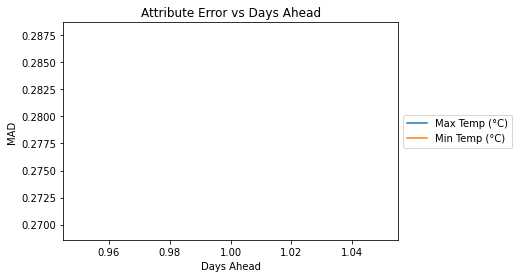

In [0]:
def plot_dayAttr_curve(path, att_list):
    """ Plots given attributes for all days_ahead

    Args:
        path: The base path of the csv files produced during training
        att_list: names of attributes you want to compare
    """
    import matplotlib.pyplot as plt
    
    plt.title("Attribute Error vs Days Ahead")
    n = set_days_ahead
    import matplotlib.pyplot as plt

    for i in range(len(att_list)): #for each attribute
      att_err=[]
      att=att_list[i]
      for day in range(1, n+1): #for each day
        temp_err = np.loadtxt("{p}_val_err_Day{d}_{att}.csv".format(p=path, d=day, att=att))
        att_err.append(temp_err)
      plt.plot(range(1,n+1), att_err, label=att)

    plt.xlabel("Days Ahead")
    plt.ylabel("MAD")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

#tester
master_path = "/content/gdrive/My Drive/APS360 Team/milestone 3/"
p = master_path + "Checkpoints/weatherSurrRNN_bs30_lr0.01_epoch1"
plot_dayAttr_curve(p,set_label_attributes)


In [0]:
def savePrintDayAtrib(model_path, m_day_err, printbool =True):
  '''save into csv or print day-attribute combos
  '''
  #print(m_day_err)
  num_epochs =[]
  for i in range(len(m_day_err)): #for each attribute
  
    transp =[]
    for epoch in range(len(m_day_err[0])):
      transp.append(m_day_err[i][epoch])
      if i==0:
        num_epochs.append(epoch + 1)
    #for th last epoch, save values
    day=glob_dayAttr_labels[i].split(maxsplit=1)[0]
    att_name = glob_dayAttr_labels[i].split(maxsplit=1)[1]
    np.savetxt("{p}_val_err_{x}_{attribute}.csv".format(p=model_path, x = day, attribute = att_name), m_day_err[i])
    
    if(printbool):
      #label2 = 'Attribute {}'.format(i)
      label2 = '{}'.format(glob_dayAttr_labels[i])
      plt.plot(num_epochs,transp, label = label2)
      plt.xlabel('Epochs')
      plt.ylabel('MAD')
      plt.title('MAD of Attributes')
      plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

      #plt.legend()




### Architecture

In [0]:
class weatherSurrRNN(nn.Module):
    """ Input is no longer default value
        To be able to change hyperparameters easily please manually input the values everytime """
    """ Copy Paste:"""                """VV any number VV"""
    #weatherSurrRNN(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size)
    def __init__(self, hidden_size, input_size, output_size, n_layers = 1): #,dropout=DROPOUT
        super(weatherSurrRNN, self).__init__()
        self.name = "weatherSurrRNN"
        self.rnn = nn.RNN(input_size, hidden_size, n_layers, batch_first=True) # there is RNN, GRU, LSTM
        self.decoder = nn.Linear(hidden_size, output_size)

    def forward(self, inp,  hidden = None):
        #print("Hi")
        #print(inp.shape)
        if(hidden == None):
          out, _ = self.rnn(inp)
        else:
          out, _ = self.rnn(inp, hidden)
        #print(out)
        out = self.decoder(out[:, -1, :])
        return out

In [0]:
#weatherSurrRNN(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size)

In [0]:
class weatherSurrGRU(nn.Module):
    """ Input is no longer default value
        To be able to change hyperparameters easily please manually input the values everytime """
    """ Copy Paste:"""        """VV any number VV"""
    #weatherSurrGRU(hidden_size = glob_inp_size(), input_size = glob_inp_size, output_size = glob_out_size
    def __init__(self, hidden_size, input_size, output_size, n_layers = 1): #,dropout=DROPOUT
        super(weatherSurrGRU, self).__init__()
        self.name = "weatherSurrGRU"
        self.rnn = nn.GRU(input_size, hidden_size, n_layers, batch_first=True) # there is RNN, GRU, LSTM
        self.decoder = nn.Linear(hidden_size, output_size)

    def forward(self, inp,  hidden = None):
        if(hidden == None):
          out, _ = self.rnn(inp)
        else:
          out, _ = self.rnn(inp, hidden)
        out = self.decoder(out[:, -1, :])
        return out

In [0]:
set_num_attributes = 15 # MUST CHANGE THIS - either 2,6 or 15 depending on what ur training rip
class weatherSurrComplexLSTM(nn.Module):

    def __init__(self, hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size, n_layers = 3): #,dropout=DROPOUT
        super(weatherSurrComplexLSTM, self).__init__()
        self.name = "weatherSurrComplexLSTM"
        self.rnn = nn.LSTM(input_size, hidden_size, n_layers, batch_first=True) # there is RNN, GRU, LSTM # dropout is NOT helpful in the LSTM
        self.fc1 = nn.Linear(hidden_size, hidden_size*50)
        self.fc2 = nn.Linear(hidden_size*50,  output_size)

    def forward(self, inp,  hidden = None):
        if(hidden == None):
          out, _ = self.rnn(inp)
        else:
          out, _ = self.rnn(inp, hidden)
        out = self.fc1(out[:, -1, :])
        out = F.leaky_relu(out) 
        out = self.fc2(out)
        return out

In [0]:
class weatherSurrRNN_complex(nn.Module):
    """ Input is no longer default value
        To be able to change hyperparameters easily please manually input the values everytime """
    """ Copy Paste:"""                """VV any number VV"""
    #weatherSurrRNN(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size)
    def __init__(self, hidden_size, input_size, output_size, n_layers = 3): #,dropout=DROPOUT
        super(weatherSurrRNN_complex, self).__init__()
        self.name = "weatherSurrRNN_complex"
        self.rnn = nn.RNN(input_size, hidden_size, n_layers, batch_first=True) # there is RNN, GRU, LSTM
        self.fc1 = nn.Linear(hidden_size, hidden_size*50)
        self.fc2 = nn.Linear(hidden_size*50,  output_size)

    def forward(self, inp,  hidden = None):
        if(hidden == None):
          out, _ = self.rnn(inp)
        else:
          out, _ = self.rnn(inp, hidden)
        #print(out)
        out = self.fc1(out[:, -1, :])
        out = F.leaky_relu(out) 
        out = self.fc2(out)
        return out

In [0]:
#graph generated out, please keep!
#ais's change based on sahar's lstm version
#changed based on sahar's original version,
#not including the set_num_attribute (cuz dont see how it is used..)
class weatherSurrComplexLSTM(nn.Module):

    def __init__(self, hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size, n_layers = 3,drop_prob = 0.2): #,dropout=DROPOUT
        super(weatherSurrComplexLSTM, self).__init__()
        self.name = "weatherSurrComplexLSTM"
        self.rnn = nn.LSTM(input_size, hidden_size, n_layers, batch_first=True, dropout = drop_prob) # there is RNN, GRU, LSTM # dropout is NOT helpful in the LSTM
        self.fc = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()

    def forward(self, inp,  hidden = None):
        if(hidden == None):
          out, _ = self.rnn(inp)
        else:
          out, _ = self.rnn(inp, hidden)
        out = self.fc(out[:, -1, :])
        out = F.leaky_relu(out) 
        return out

In [0]:
#ais's GRU based on ali's version
class weatherSurrGRUComplex(nn.Module):
    """ Input is no longer default value
        To be able to change hyperparameters easily please manually input the values everytime """
    """ Copy Paste:"""        """VV any number VV"""
    #weatherSurrGRU(hidden_size = glob_inp_size(), input_size = glob_inp_size, output_size = glob_out_size)
    def __init__(self, hidden_size, input_size, output_size, n_layers = 1, drop_prob = 0.2): #,dropout=DROPOUT
        super(weatherSurrGRUComplex, self).__init__()
        self.name = "weatherSurrGRUComplex"
        self.rnn = nn.GRU(input_size, hidden_size, n_layers, batch_first=True, dropout = drop_prob) # there is RNN, GRU, LSTM
        self.fc = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()

    def forward(self, inp,  hidden = None):
        if(hidden == None):
          out, _ = self.rnn(inp)
        else:
          out, _ = self.rnn(inp, hidden)
        out = self.fc(out[:, -1, :])
        out = F.leaky_relu(out) 
        return out

In [0]:
#ais's rnn based on ali's version
class weatherSurrRNNComplex(nn.Module):
    """ Input is no longer default value
        To be able to change hyperparameters easily please manually input the values everytime """
    """ Copy Paste:"""                """VV any number VV"""
    #weatherSurrRNN(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size)
    def __init__(self, hidden_size, input_size, output_size, n_layers = 1): #,dropout=DROPOUT
        super(weatherSurrRNNComplex, self).__init__()
        self.name = "weatherSurrRNNComplex"
        self.rnn = nn.RNN(input_size, hidden_size, n_layers, batch_first=True) # there is RNN, GRU, LSTM
        #fully connected layer
        self.fc = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()


    def forward(self, inp,  hidden = None):
        if(hidden == None):
          out, _ = self.rnn(inp)
        else:
          out, _ = self.rnn(inp, hidden)
        out = self.fc(out[:, -1, :])
        out = F.leaky_relu(out) 
        return out

In [0]:
#editing on sahar's version 

class weatherSurrRNNnew(nn.Module):
    """ Input is no longer default value
        To be able to change hyperparameters easily please manually input the values everytime """
    """ Copy Paste:"""                """VV any number VV"""
    #weatherSurrRNN(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size)
    def __init__(self, hidden_size, input_size, output_size, n_layers = 1): #,dropout=DROPOUT
        super(weatherSurrRNNnew, self).__init__()
        self.name = "weatherSurrRNNnew"
        self.rnn = nn.RNN(input_size, hidden_size, n_layers, batch_first=True) # there is RNN, GRU, LSTM
        self.fc1 = nn.Linear(hidden_size, hidden_size*5)
        self.fc2 = nn.Linear(hidden_size*5, output_size)
        self.relu = nn.ReLU()
        
    def forward(self, inp,  hidden = None):
        if(hidden == None):
          out, _ = self.rnn(inp)
        else:
          out, _ = self.rnn(inp, hidden)
        #print(out)
        out = self.fc1(out[:, -1, :])
        out = F.leaky_relu(out) 
        out = self.fc2(out)
        return out

In [0]:
#editing on sahar's version 

class weatherSurrRNNnew2(nn.Module):
    """ Input is no longer default value
        To be able to change hyperparameters easily please manually input the values everytime """
    """ Copy Paste:"""                """VV any number VV"""
    #weatherSurrRNN(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size)
    def __init__(self, hidden_size, input_size, output_size, n_layers = 1): #,dropout=DROPOUT
        super(weatherSurrRNNnew2, self).__init__()
        self.name = "weatherSurrRNNnew2"
        self.rnn = nn.RNN(input_size, hidden_size, n_layers, batch_first=True) # there is RNN, GRU, LSTM
        self.fc1 = nn.Linear(hidden_size, hidden_size*15)
        self.fc2 = nn.Linear(hidden_size*15, output_size)
        self.relu = nn.ReLU()
        
    def forward(self, inp,  hidden = None):
        if(hidden == None):
          out, _ = self.rnn(inp)
        else:
          out, _ = self.rnn(inp, hidden)
        #print(out)
        out = self.fc1(out[:, -1, :])
        out = F.leaky_relu(out) 
        out = self.fc2(out)
        return out

In [0]:
#editing on sahar's version 

class weatherSurrRNNnewVersion(nn.Module):
    """ Input is no longer default value
        To be able to change hyperparameters easily please manually input the values everytime """
    """ Copy Paste:"""                """VV any number VV"""
    #weatherSurrRNN(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size)
    def __init__(self, hidden_size, input_size, output_size, n_layers = 1): #,dropout=DROPOUT
        super(weatherSurrRNNnewVersion, self).__init__()
        self.name = "weatherSurrRNNnewVersion"
        self.rnn = nn.RNN(input_size, hidden_size, n_layers, batch_first=True) # there is RNN, GRU, LSTM
        self.fc1 = nn.Linear(hidden_size, hidden_size*5)
        self.fc2 = nn.Linear(hidden_size*5, output_size)
       # self.relu = nn.ReLU()
        
    def forward(self, inp,  hidden = None):
        if(hidden == None):
          out, _ = self.rnn(inp)
        else:
          out, _ = self.rnn(inp, hidden)
        #print(out)
        out = self.fc1(out[:, -1, :])
        out = F.leaky_relu(out) 
        out = self.fc2(out)
        return out

In [0]:
#editing on sahar's version 

class weatherSurrRNNnew3(nn.Module):
    """ Input is no longer default value
        To be able to change hyperparameters easily please manually input the values everytime """
    """ Copy Paste:"""                """VV any number VV"""
    #weatherSurrRNN(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size)
    def __init__(self, hidden_size, input_size, output_size, n_layers = 1): #,dropout=DROPOUT
        super(weatherSurrRNNnew3, self).__init__()
        self.name = "weatherSurrRNNnew3"
        self.rnn = nn.RNN(input_size, hidden_size, n_layers, batch_first=True) # there is RNN, GRU, LSTM
        self.fc1 = nn.Linear(hidden_size, hidden_size*100)
        self.fc2 = nn.Linear(hidden_size*100, output_size)
        self.relu = nn.ReLU()
        
    def forward(self, inp,  hidden = None):
        if(hidden == None):
          out, _ = self.rnn(inp)
        else:
          out, _ = self.rnn(inp, hidden)
        #print(out)
        out = self.fc1(out[:, -1, :])
        out = F.leaky_relu(out) 
        out = self.fc2(out)
        return out

In [0]:
#editing on sahar's version 

class weatherSurrRNNnew4(nn.Module):
    """ Input is no longer default value
        To be able to change hyperparameters easily please manually input the values everytime """
    """ Copy Paste:"""                """VV any number VV"""
    #weatherSurrRNN(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size)
    def __init__(self, hidden_size, input_size, output_size, n_layers = 1): #,dropout=DROPOUT
        super(weatherSurrRNNnew4, self).__init__()
        self.name = "weatherSurrRNNnew4"
        self.rnn = nn.RNN(input_size, hidden_size, n_layers, batch_first=True) # there is RNN, GRU, LSTM
        self.fc1 = nn.Linear(hidden_size, hidden_size*3)
        self.fc2 = nn.Linear(hidden_size*3, output_size)
        self.relu = nn.ReLU()
        
    def forward(self, inp,  hidden = None):
        if(hidden == None):
          out, _ = self.rnn(inp)
        else:
          out, _ = self.rnn(inp, hidden)
        #print(out)
        out = self.fc1(out[:, -1, :])
        out = F.leaky_relu(out) 
        out = self.fc2(out)
        return out

In [0]:
#editing on sahar's version 

class weatherSurrRNNnew5(nn.Module):
    """ Input is no longer default value
        To be able to change hyperparameters easily please manually input the values everytime """
    """ Copy Paste:"""                """VV any number VV"""
    #weatherSurrRNN(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size)
    def __init__(self, hidden_size, input_size, output_size, n_layers = 1): #,dropout=DROPOUT
        super(weatherSurrRNNnew5, self).__init__()
        self.name = "weatherSurrRNNnew4"
        self.rnn = nn.RNN(input_size, hidden_size, n_layers, batch_first=True) # there is RNN, GRU, LSTM
        self.fc1 = nn.Linear(hidden_size, hidden_size*2)
        self.fc2 = nn.Linear(hidden_size*2, output_size)
        self.relu = nn.ReLU()
        
    def forward(self, inp,  hidden = None):
        if(hidden == None):
          out, _ = self.rnn(inp)
        else:
          out, _ = self.rnn(inp, hidden)
        #print(out)
        out = self.fc1(out[:, -1, :])
        out = F.leaky_relu(out) 
        out = self.fc2(out)
        return out

In [0]:
class fullyConnectedRNN(nn.Module):
    """ Input is no longer default value
        To be able to change hyperparameters easily please manually input the values everytime """
    """ Copy Paste:"""                """VV any number VV"""
    #fullyConnectedRNN(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size * int(set_num_days / RNN_percell_days), num_RNNS = int(set_num_days / RNN_percell_days), n_layers = 1)
    def __init__(self, hidden_size, input_size, output_size, num_RNNS, n_layers = 1): #,dropout=DROPOUT
        super(fullyConnectedRNN, self).__init__()
        self.name = "fullyConnectedRNN"
        self.hidden_size = hidden_size
        self.num_RNNS = num_RNNS
        self.n_layers = n_layers
        self.rnn = nn.RNN(input_size, hidden_size, n_layers, batch_first=True) # there is RNN, GRU, LSTM
        self.fc1 = nn.Linear(hidden_size * num_RNNS, hidden_size * 2)
        self.fc2 = nn.Linear(hidden_size * 2,  int(hidden_size * 0.75))
        self.fc3 = nn.Linear(int(hidden_size * 0.75),  output_size)

    def forward(self, inp,  hidden = None):
        if(hidden == None):
          h0 = torch.zeros(self.n_layers, inp.size(0), self.hidden_size)
          if(use_cuda):
            h0 = h0.cuda()
          out, h_last = self.rnn(inp, h0)
        else:
          out, h_last = self.rnn(inp, hidden)
        out = out.reshape(out.shape[0], out.shape[1] * out.shape[2])
        out = self.fc1(out)
        out = F.leaky_relu(out) 
        out = self.fc2(out)
        out = F.leaky_relu(out)
        out = self.fc3(out)
        return out, h_last

### Training

In [0]:
#this can do multiple attributes and multiple days, and keeps error for each day_attribute total absolute deviation
def compute_error(outputs, labels):
  '''
day_attrib_err = List of total aboslerror calculated for each label in order

ex: 
[min1, max1, min2, max2] => [err(min1), err(max1), err(min2), err(max2)]

ex output:
[11, 1, 2, 3]
Interpretation: Day 1 minimum temperature has total error of 11... Day2 max temp has total error of 1

  '''
  #day_attrib_err = {}
  day_attrib_err = np.zeros(len(labels[0]))
  err =0.0
  number_items =0
  for i in range(len(labels[0])): #for each day_attribute combo
    day_attrib_err[i] = 0
    for j, out in enumerate(outputs, 0): #for all outputs (Throughout the batch)
      day_attrib_err[i] = day_attrib_err[i] + abs(labels[j][i] - out[i])
      err += abs(labels[j][i] - out[i])
      
  number_items = len(labels[0])*len(outputs) #total number of comparisons 
  return day_attrib_err, err, number_items
    


In [0]:
def get_accuracy(net, loader, criterion):

    total_loss = 0.0
    total_err = 0.0
    number_items = 0

    for i, data in enumerate(loader, 0):
      inputs, labels = data
      inputs = inputs.view(inputs.shape[0], int(inputs.shape[1]/glob_inp_size), glob_inp_size)
      #############################################
      #To Enable GPU Usage
      if use_cuda and torch.cuda.is_available():
        inputs = inputs.cuda()
        labels = labels.cuda()
      #############################################
      outputs = net(inputs.float())
      loss = criterion(outputs, labels.float()) 
      total_loss += loss.item()
      
      #cur_err, cur_num = compute_error(outputs, labels)
      cur_days_ahead_err, cur_err, cur_num = compute_error(outputs, labels)
      
      if i==0: #need to intialize
        tot_days_ahead_err=cur_days_ahead_err
      
      tot_days_ahead_err += cur_days_ahead_err
      total_err += cur_err
      number_items += cur_num
      
    mean_days_ahead_err = tot_days_ahead_err / number_items
    #print('get acc: mean_days_ahead_err: ', mean_days_ahead_err)
    err = float(total_err) / number_items
    loss = float(total_loss) / (i + 1)
    return mean_days_ahead_err, err, loss
    #return err, loss

In [0]:
use_cuda = True
def train(net, trainingSet, validationSet, batch_size, num_epochs, learning_rate, master_path, ID = None, do_save = True):
    torch.manual_seed(777)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(net.parameters(), lr=learning_rate)

    train_loader = torch.utils.data.DataLoader(trainingSet, batch_size=batch_size, 
                                            num_workers=1, shuffle=True)
    val_loader = torch.utils.data.DataLoader(validationSet, batch_size=batch_size, 
                                            num_workers=1, shuffle=True)

    # Set up some numpy arrays to store the training/test loss/erruracy
    train_err = np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_err = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)
    mean_day_attr_err = np.zeros([len(trainingSet[0][1]), num_epochs])
    #mean_day_attr_err = {}
    ########################################################################
    start_time = time.time()
    print ("Training Started...")
    for epoch in range(num_epochs):
        total_train_loss = 0.0
        total_train_err = 0.0
        number_items = 0
        for i, data in enumerate(train_loader, 0): # Itterate through each batch
            #print("Training", i, "out of", len(train_loader))
            inputs, labels = data
            inputs = inputs.view(inputs.shape[0], int(inputs.shape[1]/glob_inp_size), glob_inp_size)
            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              inputs = inputs.cuda()
              labels = labels.cuda()
            #############################################
            
              
            outputs = net(inputs.float())             # forward pass
            loss = criterion(outputs, labels.float()) # compute the total loss
            loss.backward()                           # backward pass (compute parameter updates)
            optimizer.step()                          # make the updates for each parameter
            optimizer.zero_grad()                     # a clean up step for PyTorch

            # Calculate the statistics
            total_train_loss += loss.item()
            day_attr_dict, cur_err, cur_num = compute_error(outputs, labels) 
            total_train_err += cur_err
            number_items += cur_num
             
          
        train_err[epoch] = float(total_train_err) / number_items
        train_loss[epoch] = float(total_train_loss) / (i+1)

        mean_day_attr_err[:, epoch] ,val_err[epoch], val_loss[epoch] = get_accuracy(net, val_loader, criterion) 
        #mean_day_attr_err[:, epoch] = [ [mean errors for epoch 0 for attribute 1, mean errors for epoch1 for attribute 1,...] [mean erros for attribute 2 for epoch 0, ..] ]

        
        # Save the state of model at current epoch
        if(do_save):
          torch.save(net.state_dict(), master_path + "Saved states/" + get_model_name(net.name, batch_size, learning_rate, epoch + 1, ID))
        
        print(("Epoch {}: Train err: {}, Train loss: {} |"
              + "Validation err: {}, Validation loss: {}"
                ).format(
                    epoch + 1,
                    train_err[epoch],
                    train_loss[epoch],
                    val_err[epoch],
                    val_loss[epoch]))
    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))

    # Write the train/test loss/err into CSV file for plotting later
    model_path = master_path + "Checkpoints/" + get_model_name(net.name, batch_size, learning_rate, epoch + 1, ID)
    epochs = np.arange(1, num_epochs + 1)
    np.savetxt("{}_train_err.csv".format(model_path), train_err)
    np.savetxt("{}_train_loss.csv".format(model_path), train_loss)
    np.savetxt("{}_val_err.csv".format(model_path), val_err)
    np.savetxt("{}_val_loss.csv".format(model_path), val_loss)
    savePrintDayAtrib(model_path, mean_day_attr_err, printbool=True) #print and save attributes
    

In [0]:
def get_accuracy_FULLYCONNECTEDRNN(net, loader, criterion):

    total_loss = 0.0
    total_err = 0.0
    number_items = 0

    for i, data in enumerate(loader, 0):
      inputs, labels = data
      inputs = inputs.view(inputs.shape[0], int(inputs.shape[1]/glob_inp_size), glob_inp_size)
      #############################################
      #To Enable GPU Usage
      if use_cuda and torch.cuda.is_available():
        inputs = inputs.cuda()
        labels = labels.cuda()
      #############################################
      outputs, _ = net(inputs.float())
      loss = criterion(outputs, labels.float()) 
      total_loss += loss.item()
      
      #cur_err, cur_num = compute_error(outputs, labels)
      cur_days_ahead_err, cur_err, cur_num = compute_error(outputs, labels)
      
      if i==0: #need to intialize
        tot_days_ahead_err=cur_days_ahead_err
      
      tot_days_ahead_err += cur_days_ahead_err
      total_err += cur_err
      number_items += cur_num
      
    mean_days_ahead_err = tot_days_ahead_err / number_items
    #print('get acc: mean_days_ahead_err: ', mean_days_ahead_err)
    err = float(total_err) / number_items
    loss = float(total_loss) / (i + 1)
    return mean_days_ahead_err, err, loss
    #return err, loss

In [0]:
def get_final_accuracy_FULLYCONNECTEDRNN(net, loader, criterion, glob_out_size):

    total_loss = 0.0
    total_err = 0.0
    number_items = 0

    for i, data in enumerate(loader, 0):
      inputs, labels = data
      inputs = inputs.view(inputs.shape[0], int(inputs.shape[1]/glob_inp_size), glob_inp_size)
      #############################################
      #To Enable GPU Usage
      if use_cuda and torch.cuda.is_available():
        inputs = inputs.cuda()
        labels = labels.cuda()
      #############################################
      outputs, _ = net(inputs.float())
      loss = criterion(outputs, labels.float()) 
      total_loss += loss.item()
      
      #cur_err, cur_num = compute_error(outputs, labels)
      cur_days_ahead_err, cur_err, cur_num = compute_error(outputs[:glob_out_size], labels[:glob_out_size])
      
      if i==0: #need to intialize
        tot_days_ahead_err=cur_days_ahead_err
      
      tot_days_ahead_err += cur_days_ahead_err
      total_err += cur_err
      number_items += cur_num
      
    mean_days_ahead_err = tot_days_ahead_err / number_items
    #print('get acc: mean_days_ahead_err: ', mean_days_ahead_err)
    err = float(total_err) / number_items
    loss = float(total_loss) / (i + 1)
    return mean_days_ahead_err, err, loss
    #return err, loss

In [0]:
def trainFULLYCONNECTEDRNN(net, trainingSet, validationSet, batch_size, num_epochs, learning_rate, master_path, ID = None, do_save = True):
    torch.manual_seed(777)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(net.parameters(), lr=learning_rate)

    train_loader = torch.utils.data.DataLoader(trainingSet, batch_size=batch_size, 
                                            num_workers=1, shuffle=False)
    val_loader = torch.utils.data.DataLoader(validationSet, batch_size=batch_size, 
                                            num_workers=1, shuffle=False)

    # Set up some numpy arrays to store the training/test loss/erruracy
    train_err = np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_err = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)
    mean_day_attr_err = np.zeros([len(trainingSet[0][1]), num_epochs])
    #mean_day_attr_err = {}
    ########################################################################
    start_time = time.time()
    print ("Training Started...")
    h_last = torch.zeros(net.n_layers, batch_size, net.hidden_size)
    for epoch in range(num_epochs):
        total_train_loss = 0.0
        total_train_err = 0.0
        number_items = 0
        for i, data in enumerate(train_loader, 0): # Itterate through each batch
            #print("Training", i, "out of", len(train_loader))
            inputs, labels = data
            if(inputs.shape[0] != batch_size):
              continue
            inputs = inputs.view(inputs.shape[0], int(inputs.shape[1]/glob_inp_size), glob_inp_size)
            
            
            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              inputs = inputs.cuda()
              labels = labels.cuda()
              h_last = h_last.cuda()
            #############################################
            
              
            outputs, h_last = net(inputs.float(), h_last)             # forward pass
            loss = criterion(outputs, labels.float()) # compute the total loss
            loss.backward(retain_graph=True)                           # backward pass (compute parameter updates)
            optimizer.step()                          # make the updates for each parameter
            optimizer.zero_grad()                     # a clean up step for PyTorch

            # Calculate the statistics
            total_train_loss += loss.item()
            day_attr_dict, cur_err, cur_num = compute_error(outputs, labels) 
            total_train_err += cur_err
            number_items += cur_num
             
          
        train_err[epoch] = float(total_train_err) / number_items
        train_loss[epoch] = float(total_train_loss) / (i+1)

        mean_day_attr_err[:, epoch] ,val_err[epoch], val_loss[epoch] = get_accuracy_FULLYCONNECTEDRNN(net, val_loader, criterion) 
        #mean_day_attr_err[:, epoch] = [ [mean errors for epoch 0 for attribute 1, mean errors for epoch1 for attribute 1,...] [mean erros for attribute 2 for epoch 0, ..] ]

        
        # Save the state of model at current epoch
        if(do_save):
          torch.save(net.state_dict(), master_path + "Saved states/" + get_model_name(net.name, batch_size, learning_rate, epoch + 1, ID))
        
        print(("Epoch {}: Train err: {}, Train loss: {} |"
              + "Validation err: {}, Validation loss: {}"
                ).format(
                    epoch + 1,
                    train_err[epoch],
                    train_loss[epoch],
                    val_err[epoch],
                    val_loss[epoch]))
    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))

    # Write the train/test loss/err into CSV file for plotting later
    model_path = master_path + "Checkpoints/" + get_model_name(net.name, batch_size, learning_rate, epoch + 1, ID)
    epochs = np.arange(1, num_epochs + 1)
    np.savetxt("{}_train_err.csv".format(model_path), train_err)
    np.savetxt("{}_train_loss.csv".format(model_path), train_loss)
    np.savetxt("{}_val_err.csv".format(model_path), val_err)
    np.savetxt("{}_val_loss.csv".format(model_path), val_loss)
    savePrintDayAtrib(model_path, mean_day_attr_err, printbool=True) #print and save attributes
    

# TRAINING

In [0]:
######## Useful code ########
#Saving
torch.save(saved_MODEL.state_dict(), master_path + "Saved states/first_surr_rnn")
#Loading
loaded_MODEL = MODEL(MODEL IN)
if(use_cuda):
  loaded_MODEL = MODEL.cuda()
loaded_MODEL.load_state_dict(torch.load(master_path + "Saved states/filename"))

SyntaxError: ignored

## "ais's" training session

In [0]:
weatherSurrRNNnew

Training Started...
Epoch 1: Train err: 5.388611596013058, Train loss: 58.23748049017501 |Validation err: 3.277564204099138, Validation loss: 17.827106475830078
Epoch 2: Train err: 2.7961670666128726, Train loss: 13.00544655159728 |Validation err: 2.777811844383056, Validation loss: 12.820308685302734
Epoch 3: Train err: 2.641671260752968, Train loss: 11.481355399301608 |Validation err: 2.795803633293011, Validation loss: 12.942180315653482
Epoch 4: Train err: 2.5809357556031074, Train loss: 11.100477636676946 |Validation err: 2.932418532127494, Validation loss: 14.219300548235575
Epoch 5: Train err: 2.5110075462659873, Train loss: 10.429991147289538 |Validation err: 2.7793644218632343, Validation loss: 13.073167562484741
Epoch 6: Train err: 2.577131580062845, Train loss: 11.003915884723401 |Validation err: 2.804139885838991, Validation loss: 13.208653092384338
Epoch 7: Train err: 2.511892556219383, Train loss: 10.435903562258368 |Validation err: 2.787458353484231, Validation loss: 12.

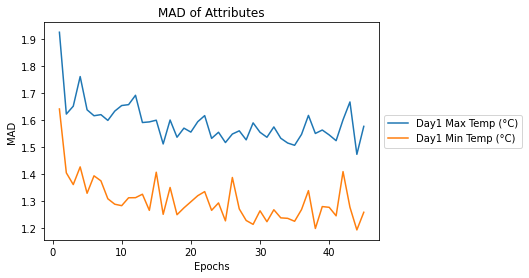

In [0]:
weather_Surr_RNN_new = weatherSurrRNNnew(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size)
if(use_cuda):
  weather_Surr_RNN_new = weather_Surr_RNN_new.cuda()
train(weather_Surr_RNN_new, trainingSet=trainingSet, validationSet=validationSet, batch_size=30, learning_rate=0.004, num_epochs=45, master_path = master_path)


In [0]:
torch.save(weather_Surr_RNN_new.state_dict(), master_path + "Saved states/first_surr_rnn")

In [0]:
weather_Surr_RNN_new = weatherSurrRNNnew(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size)
if(use_cuda):
  weather_Surr_RNN_new = weather_Surr_RNN_new.cuda()
weather_Surr_RNN_new.load_state_dict(torch.load(master_path + "Saved states/first_surr_rnn"))

<All keys matched successfully>

In [0]:
load_path = master_path + "Saved states/"
weather_Surr_RNN_new_test = weatherSurrRNNnew(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size) # weatherSurrGRU_bs30_lr0.01_epoch40
weather_Surr_RNN_new_test.load_state_dict(torch.load(load_path + get_model_name(weather_Surr_RNN_new_test.name, 30, 0.004, 40)))

<All keys matched successfully>

In [0]:
weatherSurrRNNnewVersion

Training Started...
Epoch 1: Train err: 5.388611596013058, Train loss: 58.23748049017501 |Validation err: 3.277564204099138, Validation loss: 17.827106475830078
Epoch 2: Train err: 2.7961670666128726, Train loss: 13.00544655159728 |Validation err: 2.777811844383056, Validation loss: 12.820308685302734
Epoch 3: Train err: 2.641671260752968, Train loss: 11.481355399301608 |Validation err: 2.795803633293011, Validation loss: 12.942180315653482
Epoch 4: Train err: 2.5809357556031074, Train loss: 11.100477636676946 |Validation err: 2.932418532127494, Validation loss: 14.219300548235575
Epoch 5: Train err: 2.5110075462659873, Train loss: 10.429991147289538 |Validation err: 2.7793644218632343, Validation loss: 13.073167562484741
Epoch 6: Train err: 2.577131580062845, Train loss: 11.003915884723401 |Validation err: 2.804139885838991, Validation loss: 13.208653092384338
Epoch 7: Train err: 2.511892556219383, Train loss: 10.435903562258368 |Validation err: 2.787458353484231, Validation loss: 12.

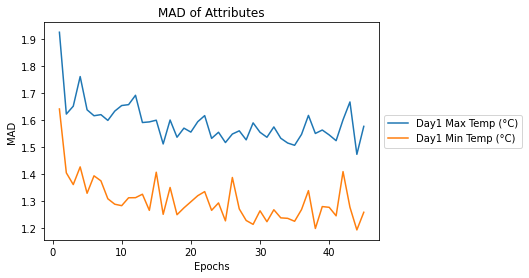

In [0]:
weather_Surr_RNNnew_Version = weatherSurrRNNnewVersion(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size)
if(use_cuda):
  weather_Surr_RNNnew_Version = weather_Surr_RNNnew_Version.cuda()
train(weather_Surr_RNNnew_Version, trainingSet=trainingSet, validationSet=validationSet, batch_size=30, learning_rate=0.004, num_epochs=45, master_path = master_path)


In [0]:
torch.save(weather_Surr_RNNnew_Version.state_dict(), master_path + "Saved states/first_surr_rnn")

In [0]:
weather_Surr_RNNnew_Version = weatherSurrRNNnewVersion(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size)
if(use_cuda):
  weather_Surr_RNNnew_Version = weather_Surr_RNNnew_Version.cuda()
weather_Surr_RNNnew_Version.load_state_dict(torch.load(master_path + "Saved states/first_surr_rnn"))

<All keys matched successfully>

In [0]:
load_path = master_path + "Saved states/"
weather_Surr_RNNnew_Version_test = weatherSurrRNNnewVersion(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size) # weatherSurrGRU_bs30_lr0.01_epoch40
weather_Surr_RNNnew_Version_test.load_state_dict(torch.load(load_path + get_model_name(weather_Surr_RNNnew_Version_test.name, 30, 0.004, 40)))

<All keys matched successfully>

ais's new version

In [0]:
weatherSurrRNNnew2

Training Started...
Epoch 1: Train err: 4.9966063905735725, Train loss: 47.640173546255454 |Validation err: 3.2883078174707423, Validation loss: 17.905258178710938
Epoch 2: Train err: 2.9616265640906216, Train loss: 14.60720587429935 |Validation err: 2.928051748688678, Validation loss: 14.31302785873413
Epoch 3: Train err: 2.7580715564575464, Train loss: 12.57378520051094 |Validation err: 2.825273798139633, Validation loss: 13.514270702997843
Epoch 4: Train err: 2.6677310173596984, Train loss: 11.884399727599261 |Validation err: 2.815584202111814, Validation loss: 13.264721632003784
Epoch 5: Train err: 2.5391935439927398, Train loss: 10.708960977319169 |Validation err: 2.630263406064793, Validation loss: 11.808358033498129
Epoch 6: Train err: 2.487277529016649, Train loss: 10.242651821815805 |Validation err: 2.9008719492665302, Validation loss: 13.953324238459269
Epoch 7: Train err: 2.4661382482281735, Train loss: 10.002922417366342 |Validation err: 2.748525190257122, Validation loss: 

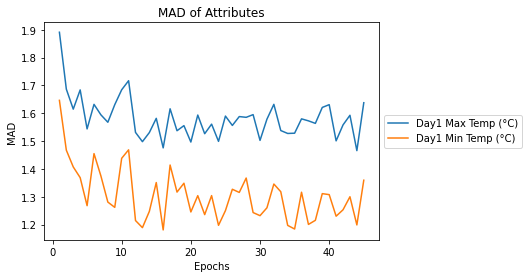

In [0]:
weather_Surr_RNN_new2 = weatherSurrRNNnew2(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size)
if(use_cuda):
  weather_Surr_RNN_new2 = weather_Surr_RNN_new2.cuda()
train(weather_Surr_RNN_new2, trainingSet=trainingSet, validationSet=validationSet, batch_size=30, learning_rate=0.004, num_epochs=45, master_path = master_path)


In [0]:
torch.save(weather_Surr_RNN_new2.state_dict(), master_path + "Saved states/first_surr_rnn")

In [0]:
weather_Surr_RNN_new2 = weatherSurrRNNnew2(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size)
if(use_cuda):
  weather_Surr_RNN_new2 = weather_Surr_RNN_new2.cuda()
weather_Surr_RNN_new2.load_state_dict(torch.load(master_path + "Saved states/first_surr_rnn"))

<All keys matched successfully>

In [0]:
load_path = master_path + "Saved states/"
weather_Surr_RNN_new2_test = weatherSurrRNNnew2(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size) # weatherSurrGRU_bs30_lr0.01_epoch40
weather_Surr_RNN_new2_test.load_state_dict(torch.load(load_path + get_model_name(weather_Surr_RNN_new2_test.name, 30, 0.004, 40)))

<All keys matched successfully>

 weatherSurrRNNnew3


Training Started...
Epoch 1: Train err: 4.0597312356767015, Train loss: 30.145993180470924 |Validation err: 3.1944533921352662, Validation loss: 17.685223420461018
Epoch 2: Train err: 2.784819364151309, Train loss: 13.033809707589345 |Validation err: 2.7588369709334932, Validation loss: 12.68667721748352
Epoch 3: Train err: 2.6329411758163688, Train loss: 11.515697198371365 |Validation err: 2.8792982759822707, Validation loss: 13.205811341603598
Epoch 4: Train err: 2.5520995939420925, Train loss: 10.677484930378117 |Validation err: 2.8657900753922845, Validation loss: 13.238770961761475
Epoch 5: Train err: 2.4804865979049544, Train loss: 10.22228886983166 |Validation err: 2.615147368389457, Validation loss: 11.479336301485697
Epoch 6: Train err: 2.5316147728880156, Train loss: 10.534043717057738 |Validation err: 2.8513519493897865, Validation loss: 13.717481931050619
Epoch 7: Train err: 2.4659061142467986, Train loss: 9.958679747908082 |Validation err: 2.6516688763875553, Validation lo

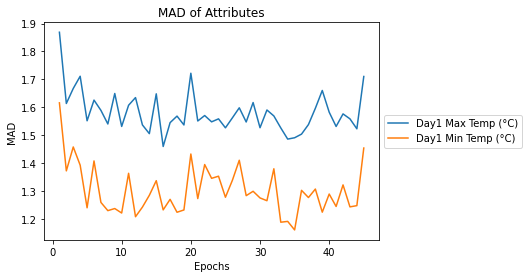

In [0]:
weather_Surr_RNN_new3 = weatherSurrRNNnew3(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size)
if(use_cuda):
  weather_Surr_RNN_new3 = weather_Surr_RNN_new3.cuda()
train(weather_Surr_RNN_new3, trainingSet=trainingSet, validationSet=validationSet, batch_size=30, learning_rate=0.004, num_epochs=45, master_path = master_path)


In [0]:
torch.save(weather_Surr_RNN_new3.state_dict(), master_path + "Saved states/first_surr_rnn")

In [0]:
weather_Surr_RNN_new3 = weatherSurrRNNnew3(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size)
if(use_cuda):
  weather_Surr_RNN_new3 = weather_Surr_RNN_new3.cuda()
weather_Surr_RNN_new3.load_state_dict(torch.load(master_path + "Saved states/first_surr_rnn"))

<All keys matched successfully>

In [0]:
load_path = master_path + "Saved states/"
weather_Surr_RNN_new3_test = weatherSurrRNNnew3(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size) # weatherSurrGRU_bs30_lr0.01_epoch40
weather_Surr_RNN_new3_test.load_state_dict(torch.load(load_path + get_model_name(weather_Surr_RNN_new3_test.name, 30, 0.004, 40)))

<All keys matched successfully>

Training Started...
Epoch 1: Train err: 5.754040117154929, Train loss: 64.16828900167387 |Validation err: 3.4443536028182233, Validation loss: 19.102476199467976
Epoch 2: Train err: 3.008467967820363, Train loss: 14.895154312865374 |Validation err: 2.912996104983299, Validation loss: 14.272984822591146
Epoch 3: Train err: 2.7965715844107937, Train loss: 13.008275032043457 |Validation err: 2.914524613486513, Validation loss: 14.224250078201294
Epoch 4: Train err: 2.647365479380152, Train loss: 11.665366512455352 |Validation err: 2.8530376396250077, Validation loss: 13.439552028973898
Epoch 5: Train err: 2.542029695356812, Train loss: 10.773069309861693 |Validation err: 2.728561486100101, Validation loss: 12.555548270543417
Epoch 6: Train err: 2.47617089895062, Train loss: 10.289295830138743 |Validation err: 2.898550290727381, Validation loss: 13.951674938201904
Epoch 7: Train err: 2.595918455349923, Train loss: 11.250514376653383 |Validation err: 2.7019312691334143, Validation loss: 12.

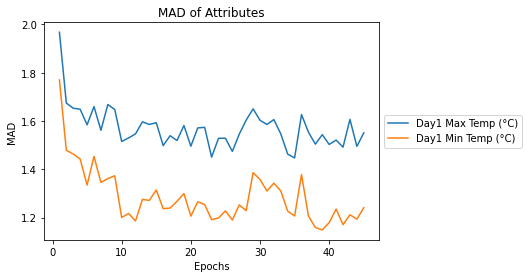

In [0]:
weather_Surr_RNN_new4 = weatherSurrRNNnew4(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size)
if(use_cuda):
  weather_Surr_RNN_new4 = weather_Surr_RNN_new4.cuda()
train(weather_Surr_RNN_new4, trainingSet=trainingSet, validationSet=validationSet, batch_size=30, learning_rate=0.004, num_epochs=45, master_path = master_path)


In [0]:
torch.save(weather_Surr_RNN_new4.state_dict(), master_path + "Saved states/first_surr_rnn")

In [0]:
weather_Surr_RNN_new4 = weatherSurrRNNnew4(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size)
if(use_cuda):
  weather_Surr_RNN_new4 = weather_Surr_RNN_new4.cuda()
weather_Surr_RNN_new4.load_state_dict(torch.load(master_path + "Saved states/first_surr_rnn"))

<All keys matched successfully>

In [0]:
load_path = master_path + "Saved states/"
weather_Surr_RNN_new4_test = weatherSurrRNNnew4(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size) # weatherSurrGRU_bs30_lr0.01_epoch40
weather_Surr_RNN_new4_test.load_state_dict(torch.load(load_path + get_model_name(weather_Surr_RNN_new4_test.name, 30, 0.004, 40)))

<All keys matched successfully>

ais's last test, last one? ? yes !!

Training Started...
Epoch 1: Train err: 6.443810065190772, Train loss: 78.24054175860262 |Validation err: 3.594736109754552, Validation loss: 20.500327666600544
Epoch 2: Train err: 3.080610234416813, Train loss: 15.605992212687454 |Validation err: 3.1002435021995383, Validation loss: 15.66385261217753
Epoch 3: Train err: 2.7961291712810734, Train loss: 13.01290995454135 |Validation err: 2.852453081493967, Validation loss: 13.070101658503214
Epoch 4: Train err: 2.7703501996730004, Train loss: 12.66983722007438 |Validation err: 2.790626667081535, Validation loss: 13.204570452372232
Epoch 5: Train err: 2.5867429715559918, Train loss: 11.059517043910615 |Validation err: 2.9210075374159, Validation loss: 13.966686447461447
Epoch 6: Train err: 2.534657500257523, Train loss: 10.563396793522246 |Validation err: 2.8556163170629563, Validation loss: 13.620604674021402
Epoch 7: Train err: 2.5923120998493743, Train loss: 11.08605719919074 |Validation err: 2.7300367140392545, Validation loss: 12.16

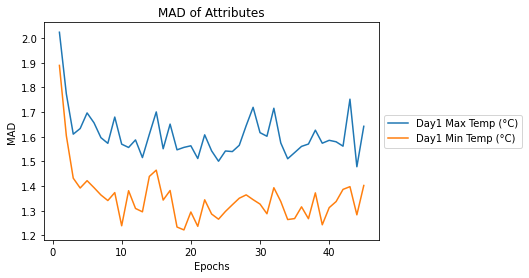

In [0]:
weather_Surr_RNN_new5 = weatherSurrRNNnew5(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size)
if(use_cuda):
  weather_Surr_RNN_new5 = weather_Surr_RNN_new5.cuda()
train(weather_Surr_RNN_new5, trainingSet=trainingSet, validationSet=validationSet, batch_size=30, learning_rate=0.004, num_epochs=45, master_path = master_path)


Training Started...
Epoch 1: Train err: 8.980673761281427, Train loss: 131.1158763937754 |Validation err: 7.234737531836614, Validation loss: 81.0950829188029
Epoch 2: Train err: 6.081529584602557, Train loss: 63.10160691770789 |Validation err: 5.117845002628778, Validation loss: 41.631902853647865
Epoch 3: Train err: 4.522692264218533, Train loss: 34.909855202452775 |Validation err: 3.9983427211474836, Validation loss: 25.20266882578532
Epoch 4: Train err: 3.6209831478605192, Train loss: 22.323792588220883 |Validation err: 3.25792570208733, Validation loss: 17.406484444936115
Epoch 5: Train err: 3.1097771163577614, Train loss: 16.137571295646772 |Validation err: 2.977008688128954, Validation loss: 14.537795543670654
Epoch 6: Train err: 2.8650306462181265, Train loss: 13.62298583984375 |Validation err: 2.8592216312187664, Validation loss: 13.596662044525146
Epoch 7: Train err: 2.730662067053626, Train loss: 12.252732453280933 |Validation err: 2.7853178466303956, Validation loss: 13.009

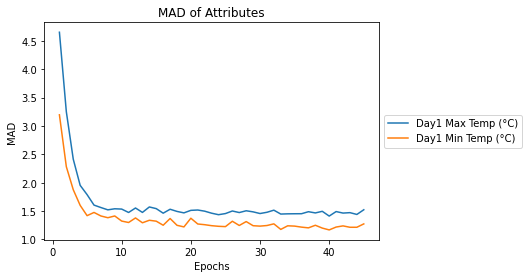

In [0]:
weather_surr_RNN = weatherSurrRNN(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size)
if(use_cuda):
  weather_surr_RNN = weather_surr_RNN.cuda()
train(weather_surr_RNN, trainingSet=trainingSet, validationSet=validationSet, batch_size=30, learning_rate=0.004, num_epochs=45, master_path = master_path)


In [0]:
torch.save(weather_surr_RNN.state_dict(), master_path + "Saved states/first_surr_rnn")

In [0]:
weather_surr_RNN = weatherSurrRNN(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size)
if(use_cuda):
  weather_surr_RNN = weather_surr_RNN.cuda()
weather_surr_RNN.load_state_dict(torch.load(master_path + "Saved states/first_surr_rnn"))

<All keys matched successfully>

Training Started...
Epoch 1: Train err: 9.114006075516272, Train loss: 134.77246083298775 |Validation err: 7.20925806894731, Validation loss: 80.38181114196777
Epoch 2: Train err: 5.928829017484947, Train loss: 60.10341868988455 |Validation err: 5.04510885174857, Validation loss: 39.559143702189125
Epoch 3: Train err: 4.3264688106384295, Train loss: 31.99033336116843 |Validation err: 3.872231915400604, Validation loss: 23.28204075495402
Epoch 4: Train err: 3.484293113398832, Train loss: 20.362897245851283 |Validation err: 3.2026412301267793, Validation loss: 16.392815510431927
Epoch 5: Train err: 3.051069770983419, Train loss: 15.383288736212743 |Validation err: 2.899559959356258, Validation loss: 13.794327656428019
Epoch 6: Train err: 2.785526878578662, Train loss: 12.645684242248535 |Validation err: 2.8681749049085807, Validation loss: 13.2885529200236
Epoch 7: Train err: 2.659515204622029, Train loss: 11.526041925769963 |Validation err: 2.7465972014580773, Validation loss: 12.251022

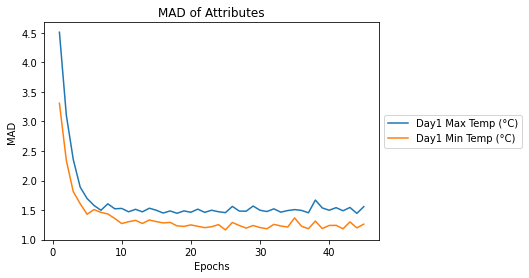

In [0]:
master_path = "/content/gdrive/My Drive/APS360 Team/milestone 3/"
weather_surr_GRU = weatherSurrGRU(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size)
if(use_cuda):
  weather_surr_GRU = weather_surr_GRU.cuda()
train(weather_surr_GRU, trainingSet=trainingSet, validationSet=validationSet, batch_size=30, learning_rate=0.004, num_epochs=45, master_path = master_path)

In [0]:
master_path = "/content/gdrive/My Drive/APS360 Team/milestone 3/"
torch.save(weather_surr_GRU.state_dict(), master_path + "Saved states/first_surr_gru")

In [0]:
weather_surr_GRU = weatherSurrGRU(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size)
if(use_cuda):
  weather_surr_GRU = weather_surr_GRU.cuda()
weather_surr_GRU.load_state_dict(torch.load(master_path + "Saved states/first_surr_gru"))

<All keys matched successfully>

In [0]:
load_path = master_path + "Saved states/"
weather_surr_GRU_test = weatherSurrGRU(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size) # weatherSurrGRU_bs30_lr0.01_epoch40
weather_surr_GRU_test.load_state_dict(torch.load(load_path + get_model_name(weather_surr_GRU_test.name, 30, 0.004, 40)))

<All keys matched successfully>

ais's test on a new GRU achitecture based on ali original one

Training Started...


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/rnn.py:50: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


Epoch 1: Train err: 10.199742554863649, Train loss: 160.36376827710296 |Validation err: 8.613097357976851, Validation loss: 111.29898262023926
Epoch 2: Train err: 7.103244276117041, Train loss: 82.7554733589904 |Validation err: 6.125133489850621, Validation loss: 58.71319135030111
Epoch 3: Train err: 5.078710059768491, Train loss: 43.388089323697024 |Validation err: 4.780020469036373, Validation loss: 37.05679178237915
Epoch 4: Train err: 4.02568500998659, Train loss: 27.92081567685898 |Validation err: 3.9658722014015915, Validation loss: 28.81606888771057
Epoch 5: Train err: 3.5218051864186055, Train loss: 21.720634486577282 |Validation err: 3.744361448507337, Validation loss: 26.647318998972576
Epoch 6: Train err: 3.268756628786619, Train loss: 19.0742399529235 |Validation err: 3.7559067603751406, Validation loss: 26.730682373046875
Epoch 7: Train err: 3.1542347668199286, Train loss: 17.947006042689495 |Validation err: 3.5438963823042413, Validation loss: 25.06188901265462
Epoch 8: T

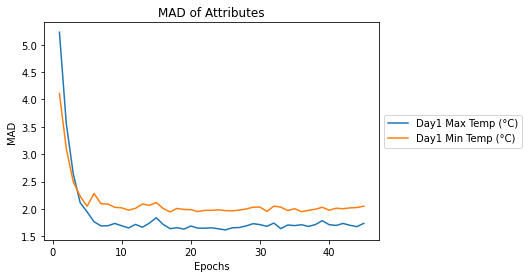

In [0]:
weather_Surr_GRU_Complex = weatherSurrGRUComplex(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size)
if(use_cuda):
  weather_Surr_GRU_Complex = weather_Surr_GRU_Complex.cuda()
train(weather_Surr_GRU_Complex, trainingSet=trainingSet, validationSet=validationSet, batch_size=30, learning_rate=0.004, num_epochs=45, master_path=master_path)

In [0]:
torch.save(weather_Surr_GRU_Complex.state_dict(), master_path + "Saved states/first_surr_rnn")


In [0]:
weather_Surr_GRU_Complex = weatherSurrGRUComplex(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size)
if(use_cuda):
  weather_Surr_GRU_Complex = weather_Surr_GRU_Complex.cuda()
weather_Surr_GRU_Complex.load_state_dict(torch.load(master_path + "Saved states/first_surr_rnn"))

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/rnn.py:50: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


<All keys matched successfully>

In [0]:
load_path = master_path + "Saved states/"
weather_Surr_GRU_Complex_test = weatherSurrGRUComplex(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size) # weatherSurrGRU_bs30_lr0.01_epoch40
weather_Surr_GRU_Complex_test.load_state_dict(torch.load(load_path + get_model_name(weather_Surr_GRU_Complex_test.name, 30, 0.004, 40)))

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/rnn.py:50: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


<All keys matched successfully>

ais's training on the newly designed RNN achitecture


Training Started...
Epoch 1: Train err: 9.181540307120004, Train loss: 133.958421576513 |Validation err: 7.69429753630236, Validation loss: 89.61758200327556
Epoch 2: Train err: 6.432480834296702, Train loss: 67.97655095139595 |Validation err: 5.792394827659529, Validation loss: 52.4662078221639
Epoch 3: Train err: 4.936285626538915, Train loss: 40.47513765831516 |Validation err: 4.806592716956858, Validation loss: 37.08772452672323
Epoch 4: Train err: 4.0636936616360355, Train loss: 28.158999717398867 |Validation err: 3.9929995940704544, Validation loss: 29.029544750849407
Epoch 5: Train err: 3.624551785248676, Train loss: 22.57917234342392 |Validation err: 3.840547320385223, Validation loss: 27.327781836191814
Epoch 6: Train err: 3.320108320532596, Train loss: 19.62142072965021 |Validation err: 3.606741594798322, Validation loss: 25.217801253000896
Epoch 7: Train err: 3.2092295843911156, Train loss: 18.57773809563624 |Validation err: 3.460902166160092, Validation loss: 24.38335156440

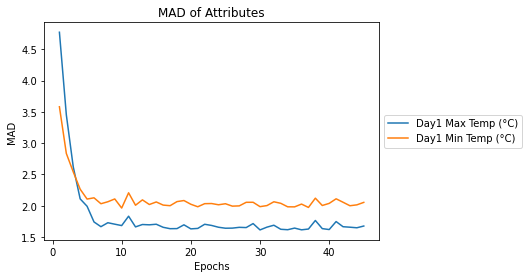

In [0]:
weather_SurrRNN_Complex = weatherSurrRNNComplex(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size)
if(use_cuda):
  weather_SurrRNN_Complex = weather_SurrRNN_Complex.cuda()
train(weather_SurrRNN_Complex, trainingSet=trainingSet, validationSet=validationSet, batch_size=30, learning_rate=0.004, num_epochs=45, master_path=master_path)

In [0]:
weatherSurrRNNComplex     weather_SurrRNN_Complex

In [0]:
torch.save(weather_SurrRNN_Complex.state_dict(), master_path + "Saved states/first_surr_rnn")

In [0]:
weather_SurrRNN_Complex = weatherSurrRNNComplex(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size)
if(use_cuda):
  weather_SurrRNN_Complex = weather_SurrRNN_Complex.cuda()
weather_SurrRNN_Complex.load_state_dict(torch.load(master_path + "Saved states/first_surr_rnn"))

<All keys matched successfully>

In [0]:
load_path = master_path + "Saved states/"
weather_SurrRNN_Complex_test = weatherSurrGRU(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size) # weatherSurrGRU_bs30_lr0.01_epoch40
weather_SurrRNN_Complex_test.load_state_dict(torch.load(load_path + get_model_name(weather_SurrRNN_Complex_test.name, 30, 0.01, 40)))

<All keys matched successfully>

## "ais's LSTM" training session

Training Started...
Epoch 1: Train err: 9.315633985416568, Train loss: 136.93280881071743 |Validation err: 7.428922564669334, Validation loss: 81.38039557139079
Epoch 2: Train err: 6.073034400651692, Train loss: 59.03821950416042 |Validation err: 5.322157643092544, Validation loss: 45.04151693979899
Epoch 3: Train err: 4.6962014176973, Train loss: 35.58980398308741 |Validation err: 4.362604141496546, Validation loss: 32.237061182657875
Epoch 4: Train err: 3.9425666664931533, Train loss: 25.881625946253948 |Validation err: 3.904883105772122, Validation loss: 28.52458143234253
Epoch 5: Train err: 3.6668790189549765, Train loss: 22.57954994619709 |Validation err: 3.6887917055174406, Validation loss: 26.47270655632019
Epoch 6: Train err: 3.3807140670409868, Train loss: 20.146545462412377 |Validation err: 3.622082568663197, Validation loss: 26.00930865605672
Epoch 7: Train err: 3.3310846789204946, Train loss: 19.35234540129361 |Validation err: 3.5562118933292544, Validation loss: 25.1421864

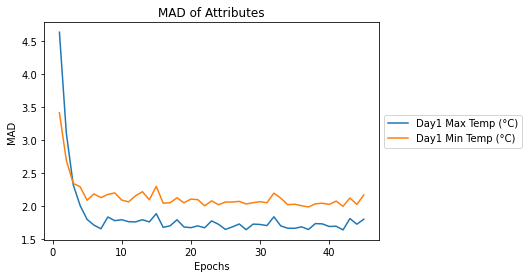

In [0]:
weather_Surr_Complex_LSTM = weatherSurrComplexLSTM(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size)
if(use_cuda):
  weather_Surr_Complex_LSTM = weather_Surr_Complex_LSTM.cuda()
train(weather_Surr_Complex_LSTM, trainingSet=trainingSet, validationSet=validationSet, batch_size=30, learning_rate=0.004, num_epochs=45, master_path=master_path)

In [0]:
torch.save(weather_Surr_Complex_LSTM.state_dict(), master_path + "Saved states/first_surr_rnn")

In [0]:
weather_Surr_Complex_LSTM = weatherSurrComplexLSTM(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size)
if(use_cuda):
  weather_Surr_Complex_LSTM = weather_Surr_Complex_LSTM.cuda()
weather_Surr_Complex_LSTM.load_state_dict(torch.load(master_path + "Saved states/first_surr_rnn"))

<All keys matched successfully>

In [0]:
load_path = master_path + "Saved states/"
weather_Surr_Complex_LSTM_test = weatherSurrComplexLSTM(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size) # weatherSurrGRU_bs30_lr0.01_epoch40
weather_Surr_Complex_LSTM_test.load_state_dict(torch.load(load_path + get_model_name(weather_Surr_Complex_LSTM_test.name, 30, 0.004, 40)))

<All keys matched successfully>

optimizing rnn achitecture


## Sahar's training session

In [0]:
weatherSurrComplexLSTM = weatherSurrComplexLSTM(hidden_size=glob_inp_size)
if(use_cuda):
  weatherSurrComplexLSTM = weatherSurrComplexLSTM.cuda()
train(weatherSurrComplexLSTM, trainingSet=trainingSet, validationSet=validationSet, batch_size=30, learning_rate=0.01, num_epochs=45, master_path=master_path)

ERROR! Session/line number was not unique in database. History logging moved to new session 59
Training Started...
torch.Size([30, 4, 24])


RuntimeError: ignored

In [0]:
#modification of janelle - 2 days ahead, (max, min) inputs
master_path = "/content/gdrive/My Drive/APS360 Team/milestone 3/"
#weather_surr_RNN = weatherSurrRNN(hidden_size=glob_inp_size, output_size=4) #number of attributes * days_ahead = 2 attributes per day * 2 days
days_ahead = 2
#weatherSurrRNN(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size)
weather_surr_RNN_complex = weatherSurrRNN_complex(hidden_size=glob_inp_size,input_size = glob_inp_size, output_size= days_ahead * len(set_attributes)) #number of attributes * days_ahead = 2 attributes per day * 2 days

if(use_cuda):
  weather_surr_RNN_complex = weather_surr_RNN_complex.cuda()
train(weather_surr_RNN_complex, trainingSet=trainingSet, validationSet=validationSet, batch_size=30, learning_rate=0.01, num_epochs=30, master_path = master_path)


## Ali's training session

Training Started...
Epoch 1: Train err: 7.51787256736864, Train loss: 97.90161752047604 |Validation err: 4.892420425023255, Validation loss: 37.385099252065025
Epoch 2: Train err: 3.94792657098819, Train loss: 25.962077415152773 |Validation err: 3.4128855508113847, Validation loss: 18.26042628288269
Epoch 3: Train err: 3.1937362189924734, Train loss: 16.39938622304838 |Validation err: 3.0444176697998904, Validation loss: 15.0613165696462
Epoch 4: Train err: 2.986658471688039, Train loss: 14.488569364155808 |Validation err: 3.028512988976213, Validation loss: 15.231853802998861
Epoch 5: Train err: 2.89189555654955, Train loss: 13.658876562771733 |Validation err: 3.0576281783620964, Validation loss: 14.775087594985962
Epoch 6: Train err: 2.880916917617585, Train loss: 13.631857290659866 |Validation err: 2.9074080209718667, Validation loss: 13.604308366775513
Epoch 7: Train err: 2.9014972506078753, Train loss: 13.666857895785816 |Validation err: 2.911167073685131, Validation loss: 13.8351

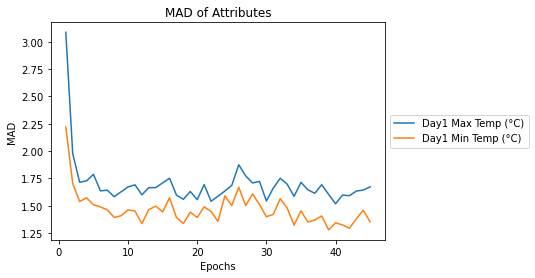

In [0]:
weather_surr_RNN = weatherSurrRNN(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size)
if(use_cuda):
  weather_surr_RNN = weather_surr_RNN.cuda()
train(weather_surr_RNN, trainingSet=trainingSet, validationSet=validationSet, batch_size=30, learning_rate=0.01, num_epochs=45, master_path = master_path)


In [0]:
torch.save(weather_surr_RNN.state_dict(), master_path + "Saved states/first_surr_rnn")

In [0]:
weather_surr_RNN = weatherSurrRNN(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size)
if(use_cuda):
  weather_surr_RNN = weather_surr_RNN.cuda()
weather_surr_RNN.load_state_dict(torch.load(master_path + "Saved states/first_surr_rnn"))

<All keys matched successfully>

In [0]:
#weatherSurrRNN(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size)

Training Started...
Epoch 1: Train err: 7.893844991243873, Train loss: 108.44777930272768 |Validation err: 4.95083696077044, Validation loss: 37.67144791285197
Epoch 2: Train err: 3.768575463115323, Train loss: 23.981873055026956 |Validation err: 3.201969858624515, Validation loss: 16.289708137512207
Epoch 3: Train err: 2.9997346233795543, Train loss: 14.749882482502558 |Validation err: 3.070517774768983, Validation loss: 15.525592168172201
Epoch 4: Train err: 2.839336329607549, Train loss: 13.10605491350775 |Validation err: 3.1183938818701193, Validation loss: 16.363622188568115
Epoch 5: Train err: 2.8573622585744562, Train loss: 13.244876841976218 |Validation err: 2.9312056917320466, Validation loss: 14.400150140126547
Epoch 6: Train err: 2.6887490117480737, Train loss: 11.87041466856656 |Validation err: 2.9760166808795394, Validation loss: 14.52064069112142
Epoch 7: Train err: 2.736367333858208, Train loss: 12.23941296747286 |Validation err: 2.973053018849217, Validation loss: 14.45

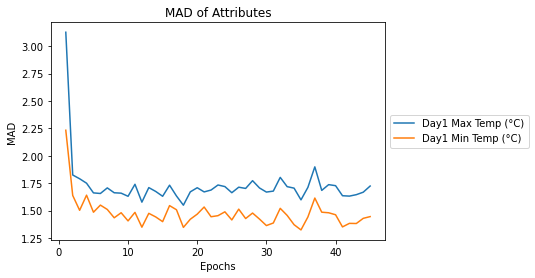

In [0]:
master_path = "/content/gdrive/My Drive/APS360 Team/milestone 3/"
weather_surr_GRU = weatherSurrGRU(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size)
if(use_cuda):
  weather_surr_GRU = weather_surr_GRU.cuda()
train(weather_surr_GRU, trainingSet=trainingSet, validationSet=validationSet, batch_size=30, learning_rate=0.01, num_epochs=45, master_path = master_path)

In [0]:
master_path = "/content/gdrive/My Drive/APS360 Team/milestone 3/"
torch.save(weather_surr_GRU.state_dict(), master_path + "Saved states/first_surr_gru")

In [0]:
weather_surr_GRU = weatherSurrGRU(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size)
if(use_cuda):
  weather_surr_GRU = weather_surr_GRU.cuda()
weather_surr_GRU.load_state_dict(torch.load(master_path + "Saved states/first_surr_gru"))

<All keys matched successfully>

In [0]:
load_path = master_path + "Saved states/"
weather_surr_GRU_test = weatherSurrGRU(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size) # weatherSurrGRU_bs30_lr0.01_epoch40
weather_surr_GRU_test.load_state_dict(torch.load(load_path + get_model_name(weather_surr_GRU_test.name, 30, 0.01, 40)))

<All keys matched successfully>

## Seasonal training

In [0]:
seasonsal_RNNS = [None] * num_seasons
for i, curRNN in enumerate(seasonsal_RNNS):  
  seasonsal_RNNS[i] = weather_surr_RNN(hidden_size=glob_inp_size)
  if(use_cuda):
    seasonsal_RNNS[i] = seasonsal_RNNS[i].cuda()
  train(seasonsal_RNNS[i], trainingSet=train_seasonal_sets[i], validationSet=val_seasonal_sets[i], batch_size=30, learning_rate=0.0100021, num_epochs=45, master_path = master_path)

In [0]:
import copy

seasonsal_RNNS = [None] * num_seasons
for i, curRNN in enumerate(seasonsal_RNNS):  
  seasonsal_RNNS[i] = copy.deepcopy(weather_surr_RNN)
  if(use_cuda):
    seasonsal_RNNS[i] = seasonsal_RNNS[i].cuda()
  train(seasonsal_RNNS[i], trainingSet=train_seasonal_sets[i], validationSet=val_seasonal_sets[i], batch_size=20, learning_rate=0.00100021, num_epochs=45, master_path = master_path, ID = 'seasonal')

In [0]:
import copy

seasonsal_GRUS = [None] * num_seasons
for i, curRNN in enumerate(seasonsal_GRUS):  
  seasonsal_GRUS[i] = copy.deepcopy(weather_surr_GRU)
  if(use_cuda):
    seasonsal_GRUS[i] = seasonsal_GRUS[i].cuda()
  train(seasonsal_GRUS[i], trainingSet=train_seasonal_sets[i], validationSet=val_seasonal_sets[i], batch_size=20, learning_rate=0.00100021, num_epochs=45, master_path = master_path, ID = 'seasonal')

# parameter tunning 


Training Started...
Epoch 1: Train err: 9.849516017462479, Train loss: 154.42769289016724 |Validation err: 6.7283593781731925, Validation loss: 66.88358739217122
Epoch 2: Train err: 4.46919447553328, Train loss: 33.575148517435245 |Validation err: 3.4364832647751724, Validation loss: 18.904025713602703
Epoch 3: Train err: 2.976550395987134, Train loss: 14.585830953988163 |Validation err: 3.1398746154462907, Validation loss: 16.35378974278768
Epoch 4: Train err: 2.737000882185645, Train loss: 12.595229809934443 |Validation err: 2.9247118980571463, Validation loss: 14.160212262471516
Epoch 5: Train err: 2.6095734661829835, Train loss: 11.383092389865356 |Validation err: 2.7803279704360246, Validation loss: 13.8314879099528
Epoch 6: Train err: 2.5368779976611195, Train loss: 10.703014704314144 |Validation err: 2.789967541905008, Validation loss: 12.447958628336588
Epoch 7: Train err: 2.4729032804932647, Train loss: 10.024426731196316 |Validation err: 2.7332639651826485, Validation loss: 1

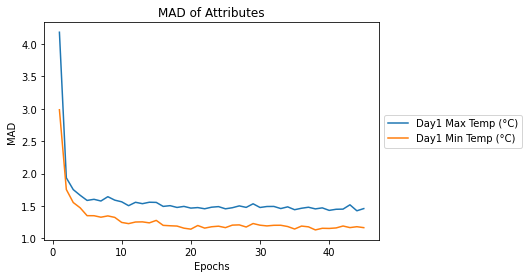

In [0]:
weather_Surr_RNN_new4 = weatherSurrRNNnew4(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size)
if(use_cuda):
  weather_Surr_RNN_new4 = weather_Surr_RNN_new4.cuda()
train(weather_Surr_RNN_new4, trainingSet=trainingSet, validationSet=validationSet, batch_size=25, learning_rate=0.001, num_epochs=45, master_path = master_path)


Training Started...
Epoch 1: Train err: 11.996265292445733, Train loss: 215.50984131206167 |Validation err: 11.746381162826935, Validation loss: 196.15939381917318
Epoch 2: Train err: 11.603182714335379, Train loss: 203.89738178253174 |Validation err: 11.357271721895806, Validation loss: 193.42840372721355
Epoch 3: Train err: 11.156504856889866, Train loss: 190.42001074010676 |Validation err: 10.862167672691028, Validation loss: 177.24094899495444
Epoch 4: Train err: 10.567357831449257, Train loss: 172.94001796028832 |Validation err: 10.219173203675036, Validation loss: 154.7750279744466
Epoch 5: Train err: 9.857079596607123, Train loss: 152.61451027610084 |Validation err: 9.49940875077913, Validation loss: 134.50301869710287
Epoch 6: Train err: 9.084646000394999, Train loss: 131.95067076249555 |Validation err: 8.741271618826397, Validation loss: 118.09495442708334
Epoch 7: Train err: 8.316153538609635, Train loss: 112.70256272229281 |Validation err: 8.046383938709212, Validation loss:

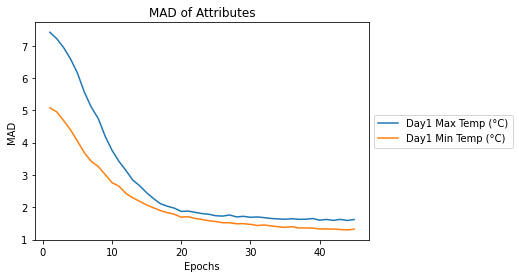

In [0]:
weather_Surr_RNN_new6 = weatherSurrRNNnew4(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size)
if(use_cuda):
  weather_Surr_RNN_new6 = weather_Surr_RNN_new6.cuda()
train(weather_Surr_RNN_new6, trainingSet=trainingSet, validationSet=validationSet, batch_size=25, learning_rate=0.0001, num_epochs=45, master_path = master_path)


Training Started...
Epoch 1: Train err: 10.699751475716983, Train loss: 177.8040507483104 |Validation err: 8.545085190582936, Validation loss: 109.1124829378995
Epoch 2: Train err: 6.135731990176887, Train loss: 63.764307355123854 |Validation err: 4.4430244173090685, Validation loss: 29.262487411499023
Epoch 3: Train err: 3.4500148404062534, Train loss: 19.35479550134568 |Validation err: 3.3549424837305026, Validation loss: 18.538630138744008
Epoch 4: Train err: 2.8709973656590178, Train loss: 13.622720075032067 |Validation err: 3.0175093849334336, Validation loss: 14.949464624578303
Epoch 5: Train err: 2.689229296186646, Train loss: 12.025496051425026 |Validation err: 2.8417063807147773, Validation loss: 15.690969987349076
Epoch 6: Train err: 2.562054693598028, Train loss: 10.96757565604316 |Validation err: 2.7567217092661096, Validation loss: 12.088263793425126
Epoch 7: Train err: 2.4745441921740756, Train loss: 10.158097282288567 |Validation err: 2.7190511768200696, Validation loss:

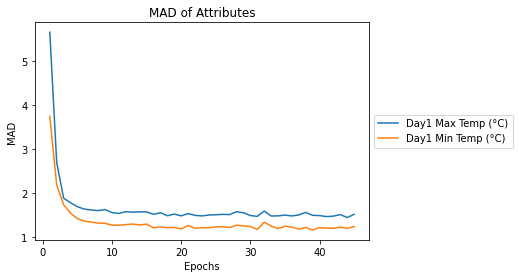

In [0]:
weather_Surr_RNN_new4 = weatherSurrRNNnew4(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size)
if(use_cuda):
  weather_Surr_RNN_new4 = weather_Surr_RNN_new4.cuda()
train(weather_Surr_RNN_new4, trainingSet=trainingSet, validationSet=validationSet, batch_size=35, learning_rate=0.001, num_epochs=45, master_path = master_path)


Training Started...
Epoch 1: Train err: 10.348880950422279, Train loss: 168.25929918681106 |Validation err: 7.7815550285517086, Validation loss: 92.05500570933025
Epoch 2: Train err: 5.323809937678777, Train loss: 48.32479910654565 |Validation err: 3.9252462829662007, Validation loss: 23.569047609965008
Epoch 3: Train err: 3.2018231879011623, Train loss: 16.667848887508864 |Validation err: 3.189794907065924, Validation loss: 16.811466534932453
Epoch 4: Train err: 2.802268485738434, Train loss: 12.996525718741221 |Validation err: 2.974047783637168, Validation loss: 14.644073804219564
Epoch 5: Train err: 2.6520263012725307, Train loss: 11.644303687631268 |Validation err: 2.7671936326152693, Validation loss: 13.065716981887817
Epoch 6: Train err: 2.5516259002158126, Train loss: 10.893252020012843 |Validation err: 2.743513652518364, Validation loss: 12.469377040863037
Epoch 7: Train err: 2.482834137216265, Train loss: 10.255376809263883 |Validation err: 2.6782406014566438, Validation loss:

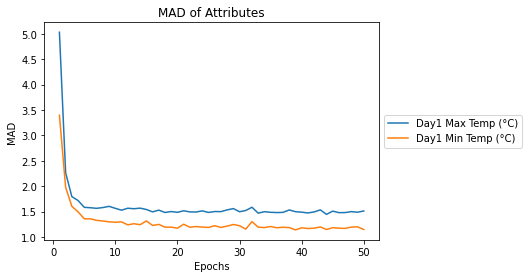

In [0]:
weather_Surr_RNN_new4 = weatherSurrRNNnew4(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size)
if(use_cuda):
  weather_Surr_RNN_new4 = weather_Surr_RNN_new4.cuda()
train(weather_Surr_RNN_new4, trainingSet=trainingSet, validationSet=validationSet, batch_size=30, learning_rate=0.001, num_epochs=50, master_path = master_path)


Training Started...
Epoch 1: Train err: 10.666467549190932, Train loss: 175.97748444572326 |Validation err: 8.370676673565772, Validation loss: 103.17500513250178
Epoch 2: Train err: 5.784083295100324, Train loss: 56.95110723707411 |Validation err: 3.948424175038431, Validation loss: 23.74742421236905
Epoch 3: Train err: 3.287126317781485, Train loss: 17.6350094023205 |Validation err: 3.148738863237537, Validation loss: 15.484506737102162
Epoch 4: Train err: 2.816728292361805, Train loss: 13.306469856746613 |Validation err: 2.910382332755357, Validation loss: 13.85236696763472
Epoch 5: Train err: 2.67035668780181, Train loss: 11.972549037327843 |Validation err: 2.8252270637959076, Validation loss: 14.735409823330967
Epoch 6: Train err: 2.5307827817034645, Train loss: 10.847437949407668 |Validation err: 2.648771793012287, Validation loss: 11.0464166727933
Epoch 7: Train err: 2.470122620905696, Train loss: 10.109139124552408 |Validation err: 2.629685116447648, Validation loss: 11.9179752

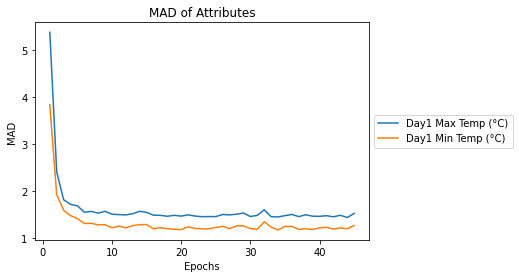

In [0]:
 weather_Surr_RNN_new4 = weatherSurrRNNnew4(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size)
if(use_cuda):
  weather_Surr_RNN_new4 = weather_Surr_RNN_new4.cuda()
train(weather_Surr_RNN_new4, trainingSet=trainingSet, validationSet=validationSet, batch_size=35, learning_rate=0.001, num_epochs=45, master_path = master_path)


Training Started...
Epoch 1: Train err: 6.075734682734882, Train loss: 71.44435849265447 |Validation err: 3.375334685182109, Validation loss: 17.982338992032137
Epoch 2: Train err: 2.8527395481141045, Train loss: 13.263318947383336 |Validation err: 2.9435183805298437, Validation loss: 13.906597657637162
Epoch 3: Train err: 2.7072598698751627, Train loss: 11.9899290175665 |Validation err: 2.829639918341786, Validation loss: 12.549455794421108
Epoch 4: Train err: 2.564605916364854, Train loss: 10.99971614565168 |Validation err: 2.7646433781085995, Validation loss: 12.55217526175759
Epoch 5: Train err: 2.724714757520396, Train loss: 12.18340583831545 |Validation err: 3.272203462543001, Validation loss: 18.80045578696511
Epoch 6: Train err: 2.5973939465724896, Train loss: 11.341360077025398 |Validation err: 2.8155435919803513, Validation loss: 12.453972816467285
Epoch 7: Train err: 2.600315641484623, Train loss: 11.211497163015698 |Validation err: 2.7166877167229626, Validation loss: 12.64

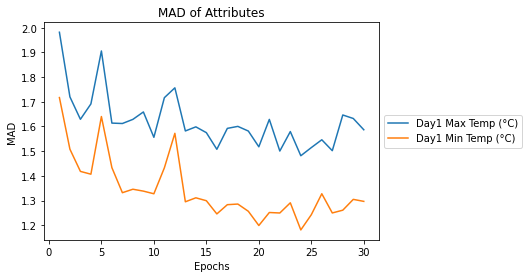

In [0]:
 weather_Surr_RNN_new4 = weatherSurrRNNnew4(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size)
if(use_cuda):
  weather_Surr_RNN_new4 = weather_Surr_RNN_new4.cuda()
train(weather_Surr_RNN_new4, trainingSet=trainingSet, validationSet=validationSet, batch_size=35, learning_rate=0.005, num_epochs=30, master_path = master_path)


In [0]:
fullyConnectedRNN

In [0]:
fully_Connected_RNN = fullyConnectedRNN(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size * int(set_num_days / RNN_percell_days), num_RNNS = int(set_num_days / RNN_percell_days), n_layers = 1)
if(use_cuda):
  fully_Connected_RNN = fully_Connected_RNN.cuda()
train(fully_Connected_RNN, trainingSet=trainingSet, validationSet=validationSet, batch_size=35, learning_rate=0.001, num_epochs=45, master_path = master_path)


Training Started...


AttributeError: ignored

# ali's best model tunning


In [0]:
fullyConnectedRNN(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size * int(set_num_days / RNN_percell_days), num_RNNS = int(set_num_days / RNN_percell_days), n_layers = 1)

fullyConnectedRNN(
  (rnn): RNN(24, 24, batch_first=True)
  (fc1): Linear(in_features=96, out_features=48, bias=True)
  (fc2): Linear(in_features=48, out_features=18, bias=True)
  (fc3): Linear(in_features=18, out_features=8, bias=True)
)

In [0]:
limit_breaker = fullyConnectedRNN(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size * int(set_num_days / RNN_percell_days), num_RNNS = int(set_num_days / RNN_percell_days), n_layers = 1)
if(use_cuda):
  limit_breaker = limit_breaker.cuda()
trainFULLYCONNECTEDRNN(limit_breaker, trainingSet=trainingSet, validationSet=validationSet, batch_size=30, learning_rate=0.005, num_epochs=45, master_path = master_path)


Training Started...


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([30, 2])) that is different to the input size (torch.Size([30, 8])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


RuntimeError: ignored

In [0]:
limit_breaker = fullyConnectedRNN(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size * int(set_num_days / RNN_percell_days), num_RNNS = int(set_num_days / RNN_percell_days), n_layers = 1)
if(use_cuda):
  limit_breaker = limit_breaker.cuda()
trainFULLYCONNECTEDRNN(limit_breaker, trainingSet=trainingSet, validationSet=validationSet, batch_size=30, learning_rate=0.005, num_epochs=45, master_path = master_path)


Training Started...


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([30, 2])) that is different to the input size (torch.Size([30, 8])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


RuntimeError: ignored

#Days_Ahead Training

In [0]:
np.argwhere(np.isnan(trainingSet))

In [0]:
#check where there are nulls of NaN in the sets
null_index=set()
for i in range(len(trainingSet)):
  if(np.isnan(trainingSet[i][0]).any() or np.isnan(trainingSet[i][1]).any()):
    null_index.add(i)
    

for j in null_index:
  print(trainingSet[j])




In [0]:
model_path = get_model_name(weather_surr_RNN)
# This is how we save right now for total error
np.savetxt("{}_train_err.csv".format(model_path), train_err)
# Let's save the mean_day_attr_err:
np.savetxt("{p}_val_err_day{x}_{attribute}.csv".format(p=model_path, x = 1, attribute = "Total Precip (mm)"), mean_day_attr_err[attribute_idx])


Training Started...
Epoch 1: Train err: 4.7057089474701, Train loss: 45.703809111085654 |Validation err: 3.9107548619586776, Validation loss: 26.356911341349285
Finished Training
Total time elapsed: 21.49 seconds


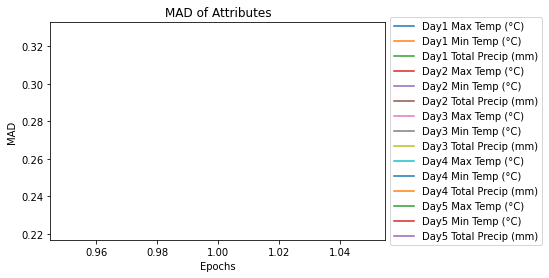

In [0]:
#janelle - 5 days ahead, (max, min) inputs
master_path = "/content/gdrive/My Drive/APS360 Team/milestone 3/"
weather_surr_RNN=weatherSurrRNN(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size)

if(use_cuda):
  weather_surr_RNN = weather_surr_RNN.cuda()
train(weather_surr_RNN, trainingSet=trainingSet, validationSet=validationSet, batch_size=30, learning_rate=0.01, num_epochs=1, master_path = master_path)
#attribute 0 = max temp day1; attr1 = min temp day 1; attr2 = max temp day2; attr3 = min temp day 2

In [0]:
#janelle - 5 days ahead, (max, min) inputs
master_path = "/content/gdrive/My Drive/APS360 Team/milestone 3/"
weather_surr_RNN=weatherSurrRNN(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size)

if(use_cuda):
  weather_surr_RNN = weather_surr_RNN.cuda()
train(weather_surr_RNN, trainingSet=trainingSet, validationSet=validationSet, batch_size=30, learning_rate=0.01, num_epochs=3, master_path = master_path)
#attribute 0 = max temp day1; attr1 = min temp day 1; attr2 = max temp day2; attr3 = min temp day 2

Training Started...
Epoch 1: Train err: 4.7057089474701, Train loss: 45.703809111085654 |Validation err: 3.9107548619586776, Validation loss: 26.356911341349285
Epoch 2: Train err: 3.8614116525834725, Train loss: 29.35738197744709 |Validation err: 3.839203659984575, Validation loss: 25.657785097757976
Epoch 3: Train err: 3.8109135218707073, Train loss: 28.852023399039492 |Validation err: 3.8273186198224947, Validation loss: 25.31646219889323
Epoch 4: Train err: 3.8080804309603677, Train loss: 29.02018625442296 |Validation err: 3.887029040172193, Validation loss: 26.448267618815105
Epoch 5: Train err: 3.84474250058968, Train loss: 29.247258068764047 |Validation err: 3.7749106489651436, Validation loss: 25.593353271484375
Epoch 6: Train err: 3.8368793525282325, Train loss: 29.258470404638004 |Validation err: 3.892979463572993, Validation loss: 26.071850776672363
Epoch 7: Train err: 3.9054070690022544, Train loss: 30.01066260141869 |Validation err: 4.150669731142612, Validation loss: 28.2

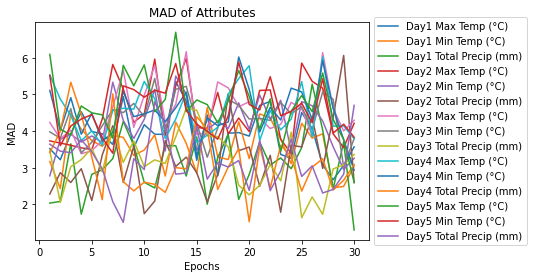

In [0]:
#janelle - 5 days ahead, (max, min) inputs
master_path = "/content/gdrive/My Drive/APS360 Team/milestone 3/"
weather_surr_RNN=weatherSurrRNN(hidden_size = glob_inp_size, input_size = glob_inp_size, output_size = glob_out_size)

if(use_cuda):
  weather_surr_RNN = weather_surr_RNN.cuda()
train(weather_surr_RNN, trainingSet=trainingSet, validationSet=validationSet, batch_size=30, learning_rate=0.01, num_epochs=30, master_path = master_path)
#attribute 0 = max temp day1; attr1 = min temp day 1; attr2 = max temp day2; attr3 = min temp day 2

Training Started...
Epoch 1: Train err: 9.905389126112148, Train loss: 154.48942524113068 |Validation err: 8.240536551018446, Validation loss: 103.90557861328125
Epoch 2: Train err: 7.175421054780047, Train loss: 84.03430703568132 |Validation err: 6.298792444420664, Validation loss: 60.587934494018555
Epoch 3: Train err: 5.6320397562927145, Train loss: 51.28972732857482 |Validation err: 5.133387778163626, Validation loss: 40.10409148534139
Epoch 4: Train err: 4.708090188409885, Train loss: 35.30715025287785 |Validation err: 4.458326779640792, Validation loss: 30.623589197794598
Epoch 5: Train err: 4.103086591149616, Train loss: 26.573120535236516 |Validation err: 3.75317544257373, Validation loss: 22.767056624094646
Epoch 6: Train err: 3.6762625101600492, Train loss: 21.48230053627328 |Validation err: 3.4708418163606964, Validation loss: 19.744285424550373
Epoch 7: Train err: 3.3894277827824166, Train loss: 18.520271967535148 |Validation err: 3.2503303022392456, Validation loss: 18.083

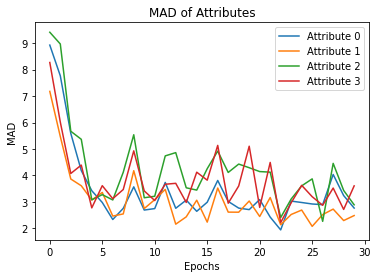

In [0]:
#janelle - 2 days ahead, (max, min) inputs
master_path = "/content/gdrive/My Drive/APS360 Team/milestone 3/"
#weather_surr_RNN = weatherSurrRNN(hidden_size=glob_inp_size, output_size=4) #number of attributes * days_ahead = 2 attributes per day * 2 days
weather_surr_RNN = weatherSurrRNN(hidden_size= glob_inp_size, output_size= set_days_ahead * len(set_attributes)) #number of attributes * days_ahead = 2 attributes per day * 2 days

if(use_cuda):
  weather_surr_RNN = weather_surr_RNN.cuda()
train(weather_surr_RNN, trainingSet=trainingSet, validationSet=validationSet, batch_size=30, learning_rate=0.01, num_epochs=30, master_path = master_path)
#attribute 0 = max temp day1; attr1 = min temp day 1; attr2 = max temp day2; attr3 = min temp day 2

In [0]:
#janelle - 2 days ahead, (max, min) inputs
master_path = "/content/gdrive/My Drive/APS360 Team/milestone 3/"
#weather_surr_RNN = weatherSurrRNN(hidden_size=glob_inp_size, output_size=4) #number of attributes * days_ahead = 2 attributes per day * 2 days
weather_surr_RNN = weatherSurrRNN(hidden_size=glob_inp_size, output_size= days_ahead * len(set_attributes)) #number of attributes * days_ahead = 2 attributes per day * 2 days

if(use_cuda):
  weather_surr_RNN = weather_surr_RNN.cuda()
train(weather_surr_RNN, trainingSet=trainingSet, validationSet=validationSet, batch_size=30, learning_rate=0.01, num_epochs=30, master_path = master_path)


Training Started...
Epoch 1: Train err: 9.981539675376654, Train loss: 161.52362468144665 |Validation err: 8.149052263997243, Validation loss: 108.30670166015625
Epoch 2: Train err: 7.055211480097708, Train loss: 88.00901235293036 |Validation err: 6.044932336268129, Validation loss: 62.37069829305013
Epoch 3: Train err: 5.333836135828397, Train loss: 52.84146400347148 |Validation err: 4.6577081443051265, Validation loss: 39.74955129623413
Epoch 4: Train err: 4.252173962830988, Train loss: 35.032442145151634 |Validation err: 3.9242932438013254, Validation loss: 29.279794057210285
Epoch 5: Train err: 3.7089321545324783, Train loss: 26.568391408005805 |Validation err: 3.418710606704267, Validation loss: 23.396044890085857
Epoch 6: Train err: 3.240745750688964, Train loss: 21.21550178527832 |Validation err: 3.1251723349764107, Validation loss: 20.730104207992554
Epoch 7: Train err: 3.0294081284182917, Train loss: 18.960035820529885 |Validation err: 2.938289442178462, Validation loss: 18.95

# Graveyard of codes

c######################################################################
c######################################################################
a##########OOOOOOO#####################################OOOOOOO##########
a##########OOOOOOO#####################################OOOOOOO##########
a##########OOOOOOO#####################################OOOOOOO##########
a##########OOOOOOO#####################################OOOOOOO##########
c#######################################################################
c###############################^^^^^^^^^^^^^^##############################
c################################^^^^^^^^^^^###############################
c#################################^^^^^^^^^##############################













In [0]:
import pandas as pd
import numpy as np

start_date = 0
num_days = 7
station = "ON_6158355"
out_name = station + '_' + str(start_year) + '-' + str(end_year)
master_path = '/content/gdrive/My Drive/APS360 Team/milestone 1/'
dest_path = master_path + 'datasets/'
landmarks_frame = pd.read_csv(dest_path + out_name +'.csv')

n = 65
img_name = landmarks_frame.iloc[ start_date : start_date + num_days, [9, 11] ]
img_name = np.asarray(img_name)
landmarks = landmarks_frame.iloc[ start_date + num_days + 1, [9, 11] ]
landmarks = np.asarray(landmarks)
#landmarks = landmarks.astype('float').reshape(-1, 2)

print('Image name: {}'.format(img_name))
print('Landmarks shape: {}'.format(landmarks.shape))
print('First 4 Landmarks: {}'.format(landmarks[:2]))

Image name: [[10.1  2.6]
 [ 6.4  0.7]
 [ 8.1  2.4]
 [10.1  4.8]
 [11.9  7.7]
 [10.   4.1]
 [ 4.8  3.3]]
Landmarks shape: (2,)
First 4 Landmarks: [2.5 -3.7]


In [0]:
len(landmarks_frame)

4748

In [0]:
import pandas as pd
import numpy as np
start_year = 2007
end_year = 2019
start_date = 0
num_days = 7
station = "ON_6158355"
out_name = station + '_' + str(start_year) + '-' + str(end_year)
master_path = '/content/gdrive/My Drive/APS360 Team/milestone 1/'
dest_path = master_path + 'datasets/'
cur_csv = pd.read_csv(dest_path + out_name +'.csv')

n = 65
data = cur_csv.loc[ :6 , ['Max Temp (°C)', 'Min Temp (°C)'] ]
data = np.asarray(data)
data = data.astype('float')
label = cur_csv.loc[ 6, ['Max Temp (°C)', 'Min Temp (°C)'] ]
label = np.asarray(label)
label = label.astype('float')

data = data.flatten()
#data = np.expand_dims(data, axis=0)
#data = data.reshape((2,7))
label = np.asarray(label)
data = np.asarray(data)

print('Image name: {}'.format(data))
print('Image shape: {}'.format(data.shape))
print('Landmarks shape: {}'.format(label.shape))
print('First 4 Landmarks: {}'.format(label[:2]))

sample = [data, label]
sample

Image name: [10.1  2.6  6.4  0.7  8.1  2.4 10.1  4.8 11.9  7.7 10.   4.1  4.8  3.3]
Image shape: (14,)
Landmarks shape: (2,)
First 4 Landmarks: [4.8 3.3]


[array([10.1,  2.6,  6.4,  0.7,  8.1,  2.4, 10.1,  4.8, 11.9,  7.7, 10. ,
         4.1,  4.8,  3.3]), array([4.8, 3.3])]

In [0]:
"""num_seasons > 1 or meaningless and unknown behaviour"""
num_seasons = 4
seasonalSets = [None] * num_seasons
start_season_day = 0 # Index format (starts form 0)

#seasonIntervals = math.ceil(365.25 / num_seasons)
seasonIntervals = math.floor((trainingSet.end_date - trainingSet.start_date) / (math.floor((trainingSet.end_date - trainingSet.start_date + 1) / 365) * num_seasons))

if(start_season_day > seasonIntervals):
  start_season_day = start_season_day % seasonIntervals
  print("Truncated start_season_day to {}. Accepts values between 0 ~ {}".format(start_season_day, seasonIntervals-1))
if(start_season_day > 0):
  seasonalSets[-1] = SeasonalDataset(trainingSet, 0, start_season_day - 1)
curLastDay = seasonIntervals + start_season_day - 1
seasonalSets[0] = SeasonalDataset(trainingSet, start_season_day - trainingSet.num_days, curLastDay) # start date can include days from previous season to predict current season days

curStartDay = curLastDay + 1 
curLastDay = seasonIntervals + curStartDay - 1
i = 1
while(curLastDay < trainingSet.end_date): # Do not add the last interval
  print("seasonSetMaker " + str(i) + " " + str(curStartDay) + " " + str(curLastDay))
  if(seasonalSets[i] == None ):
    seasonalSets[i] = SeasonalDataset(trainingSet, curStartDay - trainingSet.num_days, curLastDay)
  else:
    seasonalSets[i] = seasonalSets[i] + SeasonalDataset(trainingSet, curStartDay - trainingSet.num_days, curLastDay)
  curStartDay = curLastDay + 1
  curLastDay = seasonIntervals + curStartDay - 1
  i += 1
  i %= num_seasons

# Now add the last set
curLastDay = trainingSet.end_date
if(seasonalSets[i] == None ):
    seasonalSets[i] = SeasonalDataset(trainingSet, curStartDay - trainingSet.num_days, curLastDay)
else:
    seasonalSets[i] = seasonalSets[i] + SeasonalDataset(trainingSet, curStartDay - trainingSet.num_days, curLastDay)

seasonSetMaker 1 91 181
seasonSetMaker 2 182 272
seasonSetMaker 3 273 363
seasonSetMaker 0 364 454
seasonSetMaker 1 455 545
seasonSetMaker 2 546 636
seasonSetMaker 3 637 727
seasonSetMaker 0 728 818
seasonSetMaker 1 819 909
seasonSetMaker 2 910 1000
seasonSetMaker 3 1001 1091
seasonSetMaker 0 1092 1182
seasonSetMaker 1 1183 1273
seasonSetMaker 2 1274 1364
seasonSetMaker 3 1365 1455
seasonSetMaker 0 1456 1546
seasonSetMaker 1 1547 1637
seasonSetMaker 2 1638 1728
seasonSetMaker 3 1729 1819
seasonSetMaker 0 1820 1910
seasonSetMaker 1 1911 2001
seasonSetMaker 2 2002 2092
seasonSetMaker 3 2093 2183


In [0]:
a = np.zeros([20, 5])
b = np.zeros(5)
b = np.asarray([1,2,3,4,5])

a[5] = b
print(a)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [1. 2. 3. 4. 5.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [0]:
out_test = torch.tensor([[1,2,3, 4],[6,7, 8,6]])
out_test.size()

torch.Size([2, 4])

In [0]:
out_test = torch.tensor([[1,2,3, 4],[6,7, 8,6]])
lab_test = torch.tensor([[-1, 2, 3, 4],[-3, 4, 5, 5]])
#out_test = torch.tensor([[1,2],[6,7]])
#lab_test = torch.tensor([[-1, 2],[-3, 4]])
f1, g1, h1 = compute_error(out_test, lab_test)
print(np.array(f1), g1, h1)

[11.  3.  3.  1.] tensor(18.) 8


In [0]:
lab_test.size()[0]

2

In [0]:
for i in f1:
  print(f1[i])

tensor(11)
tensor(3)


In [0]:
import numpy as np
arr = {}
arr[0] = f1/2
print(arr)

{0: array([5.5, 1.5])}


In [0]:
out_test = torch.tensor([[1,2,3, 4],[6,7, 8,6]])
lab_test = torch.tensor([[-1, 2, 3, 4],[-3, 4, 5, 5]])
#out_test = torch.tensor([[1,2],[6,7]])
#lab_test = torch.tensor([[-1, 2],[-3, 4]])
d1, e1, i1 = compute_error(out_test,lab_test)
print('e1: {}, i1: {}'.format(e1,i1))
print('d1:', d1)
og_e1, og_i1 = og_compute_error(out_test,lab_test)
print(og_e1, og_i1)

NameError: ignored

In [0]:
def printDayAtrib(m_day_err):
  #print(m_day_err)
  num_epochs =[]
  for i in range(len(m_day_err[0])): #for each attribute
  
    transp =[]
    for key in m_day_err:
      transp.append(m_day_err[key][i])
      if i==0:
        num_epochs.append(key)
    label2 = 'Attribute {}'.format(i)
    plt.plot(num_epochs,transp, label = label2)
    plt.xlabel('Epochs')
    plt.ylabel('MAD')
    plt.title('MAD of Attributes')
    plt.legend()




{0: [9.23330785, 7.20091235, 9.87155452, 7.73358334], 1: [8.1536098, 5.57053259, 9.46816432, 5.86635183], 2: [6, 4, 5, 6]}


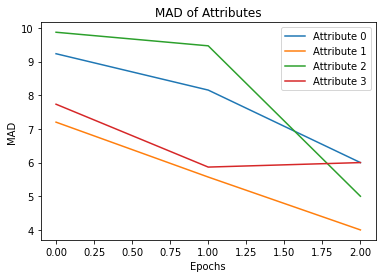

In [0]:
m1={0: [9.23330785, 7.20091235, 9.87155452, 7.73358334], 1: [8.1536098 , 5.57053259, 9.46816432, 5.86635183], 2: [6,4,5,6]}
printDayAtrib(m1)

In [0]:
# Error defined as mean difference of prediction and reallity
#this version only works with input and labels of length 2 (ex: max, min) and one day ahead
'''
def compute_error(outputs, labels):
  err = 0.0
  number_items = 0
  for j, out in enumerate(outputs, 0):
      err += abs(labels[j][0] - out[0])
      err += abs(labels[j][1] - out[1])
      number_items += 2

  return err, number_items
'''

'\ndef compute_error(outputs, labels):\n  err = 0.0\n  number_items = 0\n  for j, out in enumerate(outputs, 0):\n      err += abs(labels[j][0] - out[0])\n      err += abs(labels[j][1] - out[1])\n      number_items += 2\n\n  return err, number_items\n'

In [0]:
#this version works for lots of attributes, and multiple days ahead (improvemtn from previous copute error) but doesnt have days ahead
''''
def compute_error_old(outputs, labels):
  err = 0.0
  number_items = 0
  for j, out in enumerate(outputs, 0): #for each output array
    #print('#j',j)

    for i in range(len(out)): #for each attribute predicted *days_ahead 
      #print('i_{} labels: {} - out {}'.format(i, labels[j][i], out[i]))

     
      temp_err = abs(labels[j][i] - out[i])
      err += temp_err
     
    number_items += len(out)
      

  return err, number_items
  '''

"'\ndef compute_error_old(outputs, labels):\n  err = 0.0\n  number_items = 0\n  for j, out in enumerate(outputs, 0): #for each output array\n    #print('#j',j)\n\n    for i in range(len(out)): #for each attribute predicted *days_ahead \n      #print('i_{} labels: {} - out {}'.format(i, labels[j][i], out[i]))\n\n     \n      temp_err = abs(labels[j][i] - out[i])\n      err += temp_err\n     \n    number_items += len(out)\n      \n\n  return err, number_items\n  "

In [0]:
# # Error defined as prediction being off more than 5°C
# def compute_error(outputs, labels):
#   err = 0.0
#   number_items = 0
#   for j, out in enumerate(outputs, 0):
#       err += (abs(labels[j][0] - out[0]) > 5)
#       err += (abs(labels[j][1] - out[1]) > 5)
#       number_items += 2

#   return err, number_items